## Importing the necessary library

In [2]:
!pip install --upgrade tensorflow-hub

In [3]:
conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0

Retrieving notices: ...working... done
Note: you may need to restart the kernel to use updated packages.


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS conne


Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\saran\anaconda3

  added / updated specs:
    - cudatoolkit=11.2
    - cudnn=8.1.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.1.31  |       h56e8100_0         155 KB  conda-forge
    certifi-2025.1.31          |     pyhd8ed1ab_0         159 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         314 KB

The following packages will be UPDATED:

  ca-certificates                     2024.12.14-h56e8100_0 --> 2025.1.31-h56e8100_0 
  certifi                           2024.12.14-pyhd8ed1ab_0 --> 2025.1.31-pyhd8ed1ab_0 




ca-certificates-2025 | 155 KB    |            |   0% 

certifi-2025.1.31    | 159 KB    |            |   0% 

certifi-2025.1.31    | 159 KB    | #          |  10% 

certi

In [5]:
!pip install "tensorflow>=2.0.0"


In [6]:
!pip install tensorflow-gpu


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "C:\Users\saran\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\saran\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\saran\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\User

In [1]:
! pip install numpy~=1.20
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
%matplotlib inline
from PIL import Image
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
import tensorflow_hub as hub
import keras.utils as image
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report


In [9]:
!pip install opencv-python

In [4]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 0


In [5]:
import tensorflow as tf
print(tf.__version__)



2.18.0


## Directory assignment

In [3]:
train_dir = "train"
test_dir = "test"

## Reading the first image

In [4]:
image = cv2.imread(r"train/1.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # converting to RGB

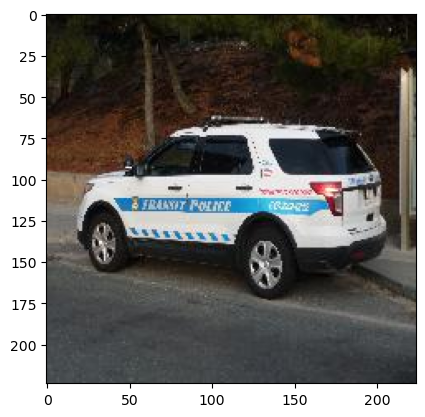

In [5]:
plt.imshow(image)

In [6]:
image.shape # This shows the shape of the image (length, width,chanel)

(224, 224, 3)

## Preprocessing

For preprocessing, the ImageDataGenerator is used. It is used for the generation of batches containing the data of tensor images and is
used in the domain of real-time data augmentation.


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Keras image data generator is used for the generation

In [8]:
image_gen = ImageDataGenerator(
    rotation_range=15,  # Reduce rotation to avoid excessive distortion
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,  # Reduce shear intensity
    zoom_range=0.15,  # Reduce zoom intensity
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1.0 / 255  # Keep rescaling but ensure proper normalization
)


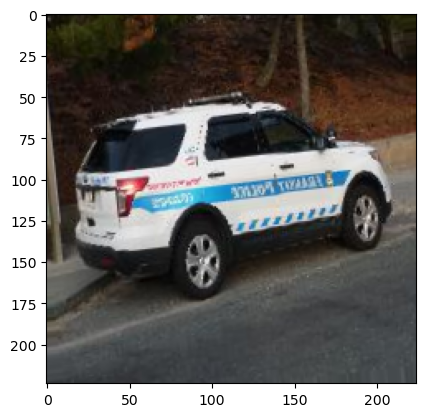

In [9]:
plt.imshow(image_gen.random_transform(image))

In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tqdm import tqdm

# Load train and test CSV files
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Load Pre-trained MobileNetV2 Model for Vehicle Type Prediction
model = MobileNetV2(weights="imagenet")

# Function to Predict Vehicle Type
def predict_vehicle_type(image_path):
    try:
        img = image.load_img(image_path, target_size=(224, 224))  # Resize image
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)  # Normalize

        preds = model.predict(img_array)
        decoded_preds = tf.keras.applications.mobilenet_v2.decode_predictions(preds, top=3)[0]  # Top 3 predictions

        # Extract most likely class
        vehicle_class = decoded_preds[0][1]  # Example: "ambulance", "fire_engine", "police_van"
        return vehicle_class
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return "unknown"

# Apply vehicle type classification to train images
tqdm.pandas()  # Enable progress bar
train_df["vehicle_type"] = train_df["image_names"].progress_apply(lambda x: predict_vehicle_type(f"train/{x}"))

# Apply vehicle type classification to test images
test_df["vehicle_type"] = test_df["image_names"].progress_apply(lambda x: predict_vehicle_type(f"test/{x}"))

# Overwrite the existing CSV files
train_df.to_csv("train.csv", index=False)
test_df.to_csv("test.csv", index=False)

print("✅ Train and Test CSV files updated successfully!")


  0%|          | 0/1646 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  0%|          | 2/1646 [00:02<28:35,  1.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  0%|          | 3/1646 [00:02<18:17,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  0%|          | 4/1646 [00:02<13:11,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  0%|          | 5/1646 [00:02<09:58,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  0%|          | 6/1646 [00:02<07:45,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  0%|          | 7/1646 [00:02<06:24,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  0%|          | 8/1646 [00:02<05:32,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  1%|          | 9/1646 [00:03<04:56,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


  1%|          | 10/1646 [00:03<04:34,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  1%|          | 11/1646 [00:03<04:20,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  1%|          | 12/1646 [00:03<04:09,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  1%|          | 13/1646 [00:03<04:02,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


  1%|          | 14/1646 [00:03<03:56,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  1%|          | 15/1646 [00:03<03:46,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  1%|          | 16/1646 [00:04<03:45,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


  1%|          | 17/1646 [00:04<03:37,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


  1%|          | 18/1646 [00:04<03:38,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  1%|          | 19/1646 [00:04<03:42,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  1%|          | 20/1646 [00:04<03:41,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  1%|▏         | 21/1646 [00:04<03:58,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  1%|▏         | 22/1646 [00:04<03:52,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  1%|▏         | 23/1646 [00:04<03:48,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  1%|▏         | 24/1646 [00:05<03:40,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  2%|▏         | 25/1646 [00:05<03:36,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  2%|▏         | 26/1646 [00:05<03:36,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  2%|▏         | 27/1646 [00:05<03:34,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  2%|▏         | 28/1646 [00:05<03:27,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  2%|▏         | 29/1646 [00:05<03:44,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  2%|▏         | 30/1646 [00:05<03:46,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  2%|▏         | 31/1646 [00:06<03:41,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  2%|▏         | 32/1646 [00:06<03:37,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


  2%|▏         | 33/1646 [00:06<03:40,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  2%|▏         | 34/1646 [00:06<03:38,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  2%|▏         | 35/1646 [00:06<03:33,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  2%|▏         | 36/1646 [00:06<03:26,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  2%|▏         | 37/1646 [00:06<03:36,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  2%|▏         | 38/1646 [00:06<03:31,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  2%|▏         | 39/1646 [00:07<03:29,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  2%|▏         | 40/1646 [00:07<03:26,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  2%|▏         | 41/1646 [00:07<03:30,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  3%|▎         | 42/1646 [00:07<03:32,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  3%|▎         | 43/1646 [00:07<03:30,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  3%|▎         | 44/1646 [00:07<03:30,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  3%|▎         | 45/1646 [00:07<03:45,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  3%|▎         | 46/1646 [00:08<03:42,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  3%|▎         | 47/1646 [00:08<03:32,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


  3%|▎         | 48/1646 [00:08<03:37,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  3%|▎         | 49/1646 [00:08<03:33,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  3%|▎         | 50/1646 [00:08<03:33,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  3%|▎         | 51/1646 [00:08<03:25,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  3%|▎         | 52/1646 [00:08<03:27,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  3%|▎         | 53/1646 [00:09<03:47,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  3%|▎         | 54/1646 [00:09<03:37,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  3%|▎         | 55/1646 [00:09<03:31,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  3%|▎         | 56/1646 [00:09<03:23,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


  3%|▎         | 57/1646 [00:09<03:15,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  4%|▎         | 58/1646 [00:09<03:12,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  4%|▎         | 59/1646 [00:09<03:02,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  4%|▎         | 60/1646 [00:09<02:59,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  4%|▎         | 61/1646 [00:09<03:15,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  4%|▍         | 62/1646 [00:10<03:08,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  4%|▍         | 63/1646 [00:10<03:00,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  4%|▍         | 64/1646 [00:10<02:57,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


  4%|▍         | 65/1646 [00:10<02:55,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  4%|▍         | 66/1646 [00:10<02:53,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  4%|▍         | 67/1646 [00:10<02:48,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


  4%|▍         | 69/1646 [00:10<02:59,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  4%|▍         | 70/1646 [00:10<02:54,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


  4%|▍         | 72/1646 [00:11<02:45,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  4%|▍         | 74/1646 [00:11<02:41,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  5%|▍         | 75/1646 [00:11<02:42,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


  5%|▍         | 76/1646 [00:11<02:43,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  5%|▍         | 77/1646 [00:11<02:43,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  5%|▍         | 78/1646 [00:11<02:43,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  5%|▍         | 79/1646 [00:11<02:58,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  5%|▍         | 80/1646 [00:12<02:57,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  5%|▍         | 81/1646 [00:12<02:52,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  5%|▍         | 82/1646 [00:12<02:50,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


  5%|▌         | 83/1646 [00:12<02:50,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


  5%|▌         | 84/1646 [00:12<02:58,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  5%|▌         | 85/1646 [00:12<02:56,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  5%|▌         | 86/1646 [00:12<03:08,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  5%|▌         | 87/1646 [00:12<02:58,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  5%|▌         | 88/1646 [00:12<02:52,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  5%|▌         | 89/1646 [00:13<02:50,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  5%|▌         | 90/1646 [00:13<02:49,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


  6%|▌         | 91/1646 [00:13<02:50,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


  6%|▌         | 92/1646 [00:13<02:49,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  6%|▌         | 93/1646 [00:13<03:00,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  6%|▌         | 94/1646 [00:13<02:54,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  6%|▌         | 95/1646 [00:13<02:50,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  6%|▌         | 97/1646 [00:13<02:45,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  6%|▌         | 98/1646 [00:13<02:43,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  6%|▌         | 99/1646 [00:14<02:42,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  6%|▌         | 100/1646 [00:14<02:44,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  6%|▌         | 101/1646 [00:14<03:02,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  6%|▌         | 102/1646 [00:14<02:55,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  6%|▋         | 103/1646 [00:14<02:49,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  6%|▋         | 104/1646 [00:14<02:46,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  6%|▋         | 105/1646 [00:14<02:45,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  6%|▋         | 106/1646 [00:14<02:44,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  7%|▋         | 107/1646 [00:14<02:43,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  7%|▋         | 108/1646 [00:15<02:53,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  7%|▋         | 109/1646 [00:15<02:56,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


  7%|▋         | 110/1646 [00:15<02:54,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  7%|▋         | 111/1646 [00:15<02:51,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  7%|▋         | 112/1646 [00:15<02:47,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  7%|▋         | 113/1646 [00:15<02:47,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  7%|▋         | 114/1646 [00:15<02:46,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  7%|▋         | 115/1646 [00:15<03:02,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  7%|▋         | 116/1646 [00:16<02:55,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  7%|▋         | 117/1646 [00:16<02:52,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  7%|▋         | 118/1646 [00:16<02:48,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  7%|▋         | 119/1646 [00:16<02:54,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  7%|▋         | 120/1646 [00:16<02:50,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  7%|▋         | 121/1646 [00:16<02:45,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  7%|▋         | 122/1646 [00:16<02:56,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  7%|▋         | 123/1646 [00:16<02:52,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  8%|▊         | 124/1646 [00:16<02:48,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  8%|▊         | 125/1646 [00:16<02:45,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


  8%|▊         | 126/1646 [00:17<02:46,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  8%|▊         | 127/1646 [00:17<02:44,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  8%|▊         | 128/1646 [00:17<02:50,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  8%|▊         | 129/1646 [00:17<03:04,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  8%|▊         | 130/1646 [00:17<02:58,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  8%|▊         | 131/1646 [00:17<02:53,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


  8%|▊         | 132/1646 [00:17<02:47,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  8%|▊         | 133/1646 [00:17<02:44,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  8%|▊         | 135/1646 [00:18<02:35,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


  8%|▊         | 137/1646 [00:18<02:42,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  8%|▊         | 138/1646 [00:18<02:46,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  8%|▊         | 139/1646 [00:18<02:44,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


  9%|▊         | 140/1646 [00:18<02:40,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  9%|▊         | 141/1646 [00:18<02:44,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  9%|▊         | 142/1646 [00:18<02:42,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  9%|▊         | 143/1646 [00:18<02:40,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  9%|▊         | 144/1646 [00:19<02:59,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  9%|▉         | 145/1646 [00:19<02:52,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  9%|▉         | 146/1646 [00:19<02:50,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  9%|▉         | 147/1646 [00:19<02:49,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  9%|▉         | 148/1646 [00:19<02:47,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  9%|▉         | 149/1646 [00:19<02:45,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  9%|▉         | 150/1646 [00:19<02:40,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  9%|▉         | 151/1646 [00:19<02:54,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  9%|▉         | 152/1646 [00:20<02:51,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  9%|▉         | 153/1646 [00:20<02:48,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  9%|▉         | 154/1646 [00:20<02:45,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


  9%|▉         | 155/1646 [00:20<02:51,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  9%|▉         | 156/1646 [00:20<02:47,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 10%|▉         | 157/1646 [00:20<02:43,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 10%|▉         | 158/1646 [00:20<02:57,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 10%|▉         | 159/1646 [00:20<02:51,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 10%|▉         | 160/1646 [00:20<02:48,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 10%|▉         | 161/1646 [00:21<02:45,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 10%|▉         | 162/1646 [00:21<02:46,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 10%|▉         | 163/1646 [00:21<02:50,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 10%|▉         | 164/1646 [00:21<02:46,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 10%|█         | 165/1646 [00:21<03:02,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 10%|█         | 166/1646 [00:21<02:53,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 10%|█         | 167/1646 [00:21<02:48,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 10%|█         | 168/1646 [00:21<02:45,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 10%|█         | 169/1646 [00:21<02:43,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 10%|█         | 170/1646 [00:22<02:44,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 10%|█         | 171/1646 [00:22<02:46,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 10%|█         | 172/1646 [00:22<02:58,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 11%|█         | 173/1646 [00:22<02:54,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 11%|█         | 174/1646 [00:22<02:49,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 11%|█         | 175/1646 [00:22<03:11,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 11%|█         | 176/1646 [00:22<03:07,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 11%|█         | 177/1646 [00:22<03:20,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 11%|█         | 178/1646 [00:23<03:06,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 11%|█         | 179/1646 [00:23<03:13,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 11%|█         | 180/1646 [00:23<02:59,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 11%|█         | 181/1646 [00:23<02:51,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 11%|█         | 182/1646 [00:23<02:47,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 11%|█         | 183/1646 [00:23<02:51,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 11%|█         | 184/1646 [00:23<02:48,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 11%|█         | 185/1646 [00:23<02:46,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 11%|█▏        | 186/1646 [00:24<02:58,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 11%|█▏        | 187/1646 [00:24<02:53,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 11%|█▏        | 188/1646 [00:24<02:47,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 11%|█▏        | 189/1646 [00:24<02:46,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 12%|█▏        | 190/1646 [00:24<02:45,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 12%|█▏        | 191/1646 [00:24<02:47,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 12%|█▏        | 192/1646 [00:24<02:43,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 12%|█▏        | 193/1646 [00:24<02:55,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 12%|█▏        | 194/1646 [00:24<02:47,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 12%|█▏        | 195/1646 [00:25<02:41,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 12%|█▏        | 196/1646 [00:25<02:46,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 12%|█▏        | 197/1646 [00:25<02:41,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 12%|█▏        | 198/1646 [00:25<02:47,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 12%|█▏        | 199/1646 [00:25<02:48,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 12%|█▏        | 200/1646 [00:25<02:56,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 12%|█▏        | 201/1646 [00:25<02:48,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 12%|█▏        | 202/1646 [00:25<02:44,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 12%|█▏        | 203/1646 [00:25<02:45,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 12%|█▏        | 204/1646 [00:26<02:47,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 12%|█▏        | 205/1646 [00:26<02:42,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 13%|█▎        | 206/1646 [00:26<02:54,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 13%|█▎        | 207/1646 [00:26<02:47,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 13%|█▎        | 208/1646 [00:26<02:49,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 13%|█▎        | 209/1646 [00:26<02:48,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 13%|█▎        | 210/1646 [00:26<02:41,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 13%|█▎        | 211/1646 [00:26<02:40,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 13%|█▎        | 212/1646 [00:26<02:39,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 13%|█▎        | 213/1646 [00:27<02:46,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 13%|█▎        | 214/1646 [00:27<02:59,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 13%|█▎        | 215/1646 [00:27<02:57,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 13%|█▎        | 216/1646 [00:27<02:53,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 13%|█▎        | 217/1646 [00:27<02:48,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 13%|█▎        | 218/1646 [00:27<02:42,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 13%|█▎        | 219/1646 [00:27<02:38,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 220/1646 [00:27<02:42,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 13%|█▎        | 221/1646 [00:28<03:29,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 13%|█▎        | 222/1646 [00:28<03:29,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 14%|█▎        | 223/1646 [00:28<03:17,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 14%|█▎        | 224/1646 [00:28<03:17,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 14%|█▎        | 225/1646 [00:28<03:17,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 14%|█▎        | 226/1646 [00:28<03:04,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 14%|█▍        | 227/1646 [00:28<02:58,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 14%|█▍        | 228/1646 [00:29<03:12,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 14%|█▍        | 229/1646 [00:29<03:10,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 14%|█▍        | 230/1646 [00:29<03:01,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 14%|█▍        | 231/1646 [00:29<02:51,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 14%|█▍        | 232/1646 [00:29<02:47,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 14%|█▍        | 233/1646 [00:29<03:01,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 14%|█▍        | 234/1646 [00:30<04:09,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 14%|█▍        | 235/1646 [00:30<04:27,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 14%|█▍        | 236/1646 [00:30<05:35,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 14%|█▍        | 237/1646 [00:30<05:23,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 14%|█▍        | 238/1646 [00:31<05:24,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 15%|█▍        | 239/1646 [00:31<05:25,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 15%|█▍        | 240/1646 [00:31<05:24,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 15%|█▍        | 241/1646 [00:31<05:59,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 15%|█▍        | 242/1646 [00:32<06:15,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 15%|█▍        | 243/1646 [00:32<05:46,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 15%|█▍        | 244/1646 [00:32<05:51,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 15%|█▍        | 245/1646 [00:32<05:04,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 15%|█▍        | 246/1646 [00:32<04:43,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 15%|█▌        | 247/1646 [00:33<04:55,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 15%|█▌        | 248/1646 [00:33<04:43,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 15%|█▌        | 249/1646 [00:33<04:41,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 15%|█▌        | 250/1646 [00:33<04:26,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 15%|█▌        | 251/1646 [00:33<04:24,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 15%|█▌        | 252/1646 [00:33<04:10,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 15%|█▌        | 253/1646 [00:34<03:59,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 15%|█▌        | 254/1646 [00:34<03:55,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 15%|█▌        | 255/1646 [00:34<03:54,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 16%|█▌        | 256/1646 [00:34<03:50,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 16%|█▌        | 257/1646 [00:34<03:44,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 16%|█▌        | 258/1646 [00:34<04:07,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 16%|█▌        | 259/1646 [00:35<03:42,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▌        | 260/1646 [00:35<03:38,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 16%|█▌        | 261/1646 [00:35<03:37,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 16%|█▌        | 262/1646 [00:35<03:26,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 16%|█▌        | 263/1646 [00:35<03:18,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 16%|█▌        | 264/1646 [00:35<03:11,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 16%|█▌        | 265/1646 [00:35<03:17,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 16%|█▌        | 266/1646 [00:36<03:35,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 16%|█▌        | 267/1646 [00:36<03:33,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 16%|█▋        | 268/1646 [00:36<03:18,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 16%|█▋        | 269/1646 [00:36<03:09,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 16%|█▋        | 270/1646 [00:36<02:58,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 16%|█▋        | 271/1646 [00:36<02:58,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 17%|█▋        | 272/1646 [00:36<02:51,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 17%|█▋        | 273/1646 [00:37<03:02,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 17%|█▋        | 274/1646 [00:37<02:49,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 17%|█▋        | 275/1646 [00:37<03:03,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 17%|█▋        | 276/1646 [00:37<03:02,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 17%|█▋        | 278/1646 [00:37<02:37,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 17%|█▋        | 279/1646 [00:37<02:34,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 17%|█▋        | 280/1646 [00:37<02:33,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 17%|█▋        | 281/1646 [00:37<02:34,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 17%|█▋        | 282/1646 [00:38<02:34,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 17%|█▋        | 283/1646 [00:38<02:29,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 17%|█▋        | 284/1646 [00:38<02:37,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 17%|█▋        | 285/1646 [00:38<02:34,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 17%|█▋        | 286/1646 [00:38<02:38,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 17%|█▋        | 287/1646 [00:38<02:39,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 17%|█▋        | 288/1646 [00:38<02:38,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 18%|█▊        | 289/1646 [00:38<02:38,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 18%|█▊        | 290/1646 [00:38<02:33,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 18%|█▊        | 291/1646 [00:39<03:11,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 18%|█▊        | 292/1646 [00:39<03:04,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 18%|█▊        | 293/1646 [00:39<02:55,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 18%|█▊        | 294/1646 [00:39<02:48,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 18%|█▊        | 295/1646 [00:39<02:52,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 18%|█▊        | 297/1646 [00:39<02:32,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 18%|█▊        | 299/1646 [00:40<02:21,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 18%|█▊        | 300/1646 [00:40<02:19,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 18%|█▊        | 301/1646 [00:40<02:26,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 18%|█▊        | 303/1646 [00:40<02:19,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 19%|█▊        | 305/1646 [00:40<02:18,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 19%|█▊        | 307/1646 [00:40<02:12, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 19%|█▉        | 309/1646 [00:41<02:09, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 19%|█▉        | 311/1646 [00:41<02:07, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 19%|█▉        | 313/1646 [00:41<02:09, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 19%|█▉        | 315/1646 [00:41<02:11, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 19%|█▉        | 317/1646 [00:41<02:13,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 19%|█▉        | 318/1646 [00:41<02:13,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 19%|█▉        | 319/1646 [00:42<02:13,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 20%|█▉        | 321/1646 [00:42<02:10, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 20%|█▉        | 323/1646 [00:42<02:09, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 20%|█▉        | 325/1646 [00:42<02:14,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 20%|█▉        | 326/1646 [00:42<02:23,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 20%|█▉        | 327/1646 [00:42<02:22,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 20%|█▉        | 328/1646 [00:43<02:20,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 20%|█▉        | 329/1646 [00:43<02:19,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 20%|██        | 330/1646 [00:43<02:20,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 20%|██        | 331/1646 [00:43<02:20,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 20%|██        | 332/1646 [00:43<02:19,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 20%|██        | 334/1646 [00:43<02:36,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 20%|██        | 335/1646 [00:43<02:32,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 20%|██        | 336/1646 [00:43<02:26,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 21%|██        | 338/1646 [00:44<02:18,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 21%|██        | 339/1646 [00:44<02:17,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 21%|██        | 340/1646 [00:44<02:18,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 21%|██        | 341/1646 [00:44<02:17,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 21%|██        | 342/1646 [00:44<02:15,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 21%|██        | 343/1646 [00:44<02:17,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 21%|██        | 344/1646 [00:44<02:30,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 21%|██        | 345/1646 [00:44<02:31,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 21%|██        | 346/1646 [00:44<02:27,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 21%|██        | 348/1646 [00:45<02:18,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 21%|██        | 349/1646 [00:45<02:17,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 21%|██▏       | 350/1646 [00:45<02:17,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 21%|██▏       | 351/1646 [00:45<02:17,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 21%|██▏       | 352/1646 [00:45<02:19,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 21%|██▏       | 353/1646 [00:45<02:18,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 22%|██▏       | 354/1646 [00:45<02:17,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 22%|██▏       | 355/1646 [00:45<02:15,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 22%|██▏       | 356/1646 [00:46<02:14,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 22%|██▏       | 357/1646 [00:46<02:25,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 22%|██▏       | 358/1646 [00:46<02:21,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 22%|██▏       | 359/1646 [00:46<02:22,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 22%|██▏       | 360/1646 [00:46<02:19,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 22%|██▏       | 361/1646 [00:46<02:17,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 22%|██▏       | 362/1646 [00:46<02:15,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 22%|██▏       | 363/1646 [00:46<02:13,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 22%|██▏       | 365/1646 [00:46<02:09,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 22%|██▏       | 366/1646 [00:47<02:20,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 22%|██▏       | 367/1646 [00:47<02:20,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 22%|██▏       | 368/1646 [00:47<02:17,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 22%|██▏       | 369/1646 [00:47<02:16,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 22%|██▏       | 370/1646 [00:47<02:17,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 23%|██▎       | 371/1646 [00:47<02:15,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 23%|██▎       | 372/1646 [00:47<02:19,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 23%|██▎       | 373/1646 [00:47<02:17,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 23%|██▎       | 374/1646 [00:47<02:14,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 23%|██▎       | 375/1646 [00:48<02:20,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 23%|██▎       | 377/1646 [00:48<02:12,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 23%|██▎       | 378/1646 [00:48<02:11,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 23%|██▎       | 379/1646 [00:48<02:14,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 23%|██▎       | 380/1646 [00:48<02:17,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 23%|██▎       | 381/1646 [00:48<02:18,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 23%|██▎       | 382/1646 [00:48<02:15,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 23%|██▎       | 383/1646 [00:48<02:13,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 23%|██▎       | 384/1646 [00:49<02:25,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 23%|██▎       | 385/1646 [00:49<02:22,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 23%|██▎       | 386/1646 [00:49<02:21,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 24%|██▎       | 387/1646 [00:49<02:17,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 24%|██▎       | 388/1646 [00:49<02:20,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 24%|██▎       | 389/1646 [00:49<02:19,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 24%|██▎       | 390/1646 [00:49<02:16,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 24%|██▍       | 391/1646 [00:49<02:15,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 24%|██▍       | 392/1646 [00:49<02:14,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 24%|██▍       | 393/1646 [00:50<02:14,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 24%|██▍       | 394/1646 [00:50<02:29,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 24%|██▍       | 395/1646 [00:50<02:23,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 24%|██▍       | 396/1646 [00:50<02:19,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 24%|██▍       | 397/1646 [00:50<02:15,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 24%|██▍       | 398/1646 [00:50<02:19,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 24%|██▍       | 399/1646 [00:50<02:17,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 24%|██▍       | 400/1646 [00:50<02:15,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 24%|██▍       | 401/1646 [00:50<02:13,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 24%|██▍       | 403/1646 [00:51<02:17,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 25%|██▍       | 405/1646 [00:51<02:13,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 25%|██▍       | 406/1646 [00:51<02:12,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 25%|██▍       | 407/1646 [00:51<02:11,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 25%|██▍       | 408/1646 [00:51<02:12,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 25%|██▍       | 409/1646 [00:51<02:12,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 25%|██▍       | 410/1646 [00:51<02:19,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 25%|██▍       | 411/1646 [00:52<02:18,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 25%|██▌       | 412/1646 [00:52<02:15,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 25%|██▌       | 413/1646 [00:52<02:12,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 25%|██▌       | 414/1646 [00:52<02:10,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 25%|██▌       | 415/1646 [00:52<02:11,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 25%|██▌       | 416/1646 [00:52<02:12,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 25%|██▌       | 417/1646 [00:52<02:14,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 25%|██▌       | 418/1646 [00:52<02:12,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 25%|██▌       | 419/1646 [00:52<02:29,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 26%|██▌       | 420/1646 [00:53<02:27,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 26%|██▌       | 421/1646 [00:53<02:20,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 26%|██▌       | 422/1646 [00:53<02:17,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 26%|██▌       | 423/1646 [00:53<02:17,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 26%|██▌       | 424/1646 [00:53<02:13,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 26%|██▌       | 425/1646 [00:53<02:11,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 26%|██▌       | 426/1646 [00:53<02:09,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 26%|██▌       | 427/1646 [00:53<02:23,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 26%|██▌       | 428/1646 [00:53<02:18,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 26%|██▌       | 429/1646 [00:54<02:16,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 26%|██▌       | 430/1646 [00:54<02:12,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 26%|██▌       | 431/1646 [00:54<02:11,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 26%|██▌       | 432/1646 [00:54<02:13,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 26%|██▋       | 434/1646 [00:54<02:08,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 26%|██▋       | 435/1646 [00:54<02:10,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 26%|██▋       | 436/1646 [00:54<02:09,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 27%|██▋       | 438/1646 [00:54<02:05,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 27%|██▋       | 440/1646 [00:55<02:03,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 27%|██▋       | 441/1646 [00:55<02:06,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 27%|██▋       | 442/1646 [00:55<02:07,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 27%|██▋       | 443/1646 [00:55<02:05,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 27%|██▋       | 444/1646 [00:55<02:13,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 27%|██▋       | 446/1646 [00:55<02:04,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 27%|██▋       | 448/1646 [00:56<01:59, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 27%|██▋       | 450/1646 [00:56<01:57, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 27%|██▋       | 452/1646 [00:56<01:59,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 28%|██▊       | 453/1646 [00:56<01:59,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 28%|██▊       | 454/1646 [00:56<02:03,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 28%|██▊       | 455/1646 [00:56<02:10,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 28%|██▊       | 456/1646 [00:56<02:09,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 28%|██▊       | 458/1646 [00:57<02:01,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 28%|██▊       | 460/1646 [00:57<01:57, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 28%|██▊       | 461/1646 [00:57<01:57, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 28%|██▊       | 463/1646 [00:57<01:54, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 28%|██▊       | 465/1646 [00:57<02:05,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 28%|██▊       | 467/1646 [00:57<02:00,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 28%|██▊       | 469/1646 [00:58<01:57, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 29%|██▊       | 471/1646 [00:58<01:56, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 29%|██▊       | 473/1646 [00:58<01:55, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 29%|██▉       | 475/1646 [00:58<01:54, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 29%|██▉       | 477/1646 [00:58<01:53, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 29%|██▉       | 479/1646 [00:59<01:51, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 29%|██▉       | 481/1646 [00:59<01:56,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 29%|██▉       | 483/1646 [00:59<01:53, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 29%|██▉       | 485/1646 [00:59<01:52, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 30%|██▉       | 487/1646 [00:59<01:50, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 30%|██▉       | 489/1646 [01:00<01:49, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 30%|██▉       | 491/1646 [01:00<01:48, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 30%|██▉       | 493/1646 [01:00<01:52, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 30%|███       | 495/1646 [01:00<02:00,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 30%|███       | 496/1646 [01:00<02:00,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 30%|███       | 497/1646 [01:00<01:59,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 30%|███       | 498/1646 [01:01<02:03,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 30%|███       | 500/1646 [01:01<01:57,  9.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 30%|███       | 502/1646 [01:01<01:53, 10.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 31%|███       | 504/1646 [01:01<01:50, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 31%|███       | 506/1646 [01:01<02:00,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 31%|███       | 508/1646 [01:02<01:54,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 31%|███       | 510/1646 [01:02<01:51, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 31%|███       | 512/1646 [01:02<01:50, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 31%|███       | 514/1646 [01:02<01:49, 10.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 31%|███▏      | 516/1646 [01:02<01:49, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 31%|███▏      | 518/1646 [01:03<01:56,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 32%|███▏      | 520/1646 [01:03<01:55,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 32%|███▏      | 521/1646 [01:03<01:56,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 32%|███▏      | 522/1646 [01:03<01:55,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 32%|███▏      | 524/1646 [01:03<01:52,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 32%|███▏      | 525/1646 [01:03<01:52,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 32%|███▏      | 527/1646 [01:03<01:52,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 32%|███▏      | 528/1646 [01:04<02:01,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 32%|███▏      | 530/1646 [01:04<01:56,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 32%|███▏      | 531/1646 [01:04<01:55,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 32%|███▏      | 533/1646 [01:04<01:51,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 32%|███▏      | 534/1646 [01:04<01:55,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 33%|███▎      | 536/1646 [01:04<01:51,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 33%|███▎      | 538/1646 [01:05<01:49, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 33%|███▎      | 540/1646 [01:05<01:47, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 33%|███▎      | 542/1646 [01:05<01:53,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 33%|███▎      | 543/1646 [01:05<01:53,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 33%|███▎      | 544/1646 [01:05<01:54,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 33%|███▎      | 546/1646 [01:05<01:51,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 33%|███▎      | 547/1646 [01:05<01:51,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 33%|███▎      | 549/1646 [01:06<01:48, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 33%|███▎      | 551/1646 [01:06<01:52,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 34%|███▎      | 552/1646 [01:06<01:52,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 34%|███▎      | 554/1646 [01:06<01:49,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 34%|███▍      | 556/1646 [01:06<01:47, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 34%|███▍      | 558/1646 [01:07<01:45, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 34%|███▍      | 560/1646 [01:07<01:44, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 34%|███▍      | 562/1646 [01:07<01:43, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 34%|███▍      | 564/1646 [01:07<01:47, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 34%|███▍      | 566/1646 [01:07<01:45, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 35%|███▍      | 568/1646 [01:08<01:45, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 35%|███▍      | 570/1646 [01:08<01:43, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 35%|███▍      | 572/1646 [01:08<01:41, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 35%|███▍      | 574/1646 [01:08<01:41, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 35%|███▍      | 576/1646 [01:08<01:47,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 35%|███▌      | 578/1646 [01:09<01:48,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 35%|███▌      | 580/1646 [01:09<01:46, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 35%|███▌      | 582/1646 [01:09<01:44, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 35%|███▌      | 584/1646 [01:09<01:43, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 36%|███▌      | 586/1646 [01:09<01:43, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 36%|███▌      | 588/1646 [01:09<01:42, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 36%|███▌      | 590/1646 [01:10<01:49,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 36%|███▌      | 591/1646 [01:10<01:48,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 36%|███▌      | 593/1646 [01:10<01:45,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 36%|███▌      | 595/1646 [01:10<01:44, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 36%|███▋      | 597/1646 [01:10<01:42, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 36%|███▋      | 599/1646 [01:11<01:43, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 37%|███▋      | 601/1646 [01:11<01:42, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 37%|███▋      | 603/1646 [01:11<01:39, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 37%|███▋      | 605/1646 [01:11<01:42, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 37%|███▋      | 607/1646 [01:11<01:40, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 37%|███▋      | 609/1646 [01:12<01:39, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 37%|███▋      | 611/1646 [01:12<01:38, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 37%|███▋      | 613/1646 [01:12<01:39, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 37%|███▋      | 615/1646 [01:12<01:37, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 37%|███▋      | 617/1646 [01:12<01:41, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 38%|███▊      | 619/1646 [01:13<01:39, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 38%|███▊      | 621/1646 [01:13<01:37, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 38%|███▊      | 623/1646 [01:13<01:36, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 38%|███▊      | 625/1646 [01:13<01:37, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 38%|███▊      | 627/1646 [01:13<01:36, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 38%|███▊      | 629/1646 [01:13<01:39, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 38%|███▊      | 631/1646 [01:14<01:37, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 38%|███▊      | 633/1646 [01:14<01:40, 10.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 39%|███▊      | 635/1646 [01:14<01:38, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 39%|███▊      | 637/1646 [01:14<01:38, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 39%|███▉      | 639/1646 [01:14<01:36, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 39%|███▉      | 641/1646 [01:15<01:35, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 39%|███▉      | 643/1646 [01:15<01:36, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 39%|███▉      | 645/1646 [01:15<01:39, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 39%|███▉      | 647/1646 [01:15<01:38, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 39%|███▉      | 649/1646 [01:15<01:37, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 40%|███▉      | 651/1646 [01:16<01:37, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 40%|███▉      | 653/1646 [01:16<01:36, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 40%|███▉      | 655/1646 [01:16<01:42,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 40%|███▉      | 657/1646 [01:16<01:41,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 40%|████      | 659/1646 [01:16<01:39,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 40%|████      | 660/1646 [01:17<01:39,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 40%|████      | 662/1646 [01:17<01:37, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 40%|████      | 664/1646 [01:17<01:36, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 40%|████      | 666/1646 [01:17<01:41,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 41%|████      | 668/1646 [01:17<01:38,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 41%|████      | 670/1646 [01:18<01:35, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 41%|████      | 672/1646 [01:18<01:33, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 41%|████      | 674/1646 [01:18<01:33, 10.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 41%|████      | 676/1646 [01:18<01:37,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 41%|████      | 678/1646 [01:18<01:40,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 41%|████▏     | 679/1646 [01:18<01:39,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 41%|████▏     | 680/1646 [01:19<01:38,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 41%|████▏     | 681/1646 [01:19<01:39,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 41%|████▏     | 683/1646 [01:19<01:38,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 42%|████▏     | 684/1646 [01:19<01:38,  9.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 42%|████▏     | 685/1646 [01:19<01:48,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 42%|████▏     | 687/1646 [01:19<01:41,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 42%|████▏     | 689/1646 [01:19<01:36,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 42%|████▏     | 691/1646 [01:20<01:34, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 42%|████▏     | 693/1646 [01:20<01:33, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 42%|████▏     | 695/1646 [01:20<01:34, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 42%|████▏     | 696/1646 [01:20<01:38,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 42%|████▏     | 698/1646 [01:20<01:35,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 43%|████▎     | 700/1646 [01:21<01:32, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 43%|████▎     | 702/1646 [01:21<01:35,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 43%|████▎     | 703/1646 [01:21<01:36,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 43%|████▎     | 704/1646 [01:21<01:38,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 43%|████▎     | 705/1646 [01:21<01:52,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 43%|████▎     | 706/1646 [01:21<01:54,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 43%|████▎     | 707/1646 [01:21<01:48,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 43%|████▎     | 709/1646 [01:22<01:40,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 43%|████▎     | 711/1646 [01:22<01:40,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 43%|████▎     | 712/1646 [01:22<01:47,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 43%|████▎     | 713/1646 [01:22<01:45,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 43%|████▎     | 714/1646 [01:22<01:42,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 43%|████▎     | 716/1646 [01:22<01:38,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 44%|████▎     | 718/1646 [01:23<01:37,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 44%|████▎     | 719/1646 [01:23<01:41,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 44%|████▎     | 720/1646 [01:23<01:41,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 44%|████▍     | 721/1646 [01:23<01:48,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 44%|████▍     | 722/1646 [01:23<01:44,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 44%|████▍     | 723/1646 [01:23<01:45,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 44%|████▍     | 724/1646 [01:23<01:42,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 44%|████▍     | 725/1646 [01:23<01:43,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 44%|████▍     | 726/1646 [01:23<01:42,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 44%|████▍     | 727/1646 [01:24<01:49,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 44%|████▍     | 729/1646 [01:24<01:42,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 44%|████▍     | 730/1646 [01:24<01:40,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 44%|████▍     | 731/1646 [01:24<01:38,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 44%|████▍     | 732/1646 [01:24<01:45,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 45%|████▍     | 733/1646 [01:24<01:42,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 45%|████▍     | 734/1646 [01:24<01:40,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 45%|████▍     | 735/1646 [01:24<01:37,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 45%|████▍     | 736/1646 [01:25<01:38,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 45%|████▍     | 737/1646 [01:25<01:38,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 45%|████▍     | 738/1646 [01:25<01:40,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 45%|████▍     | 739/1646 [01:25<01:46,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 45%|████▍     | 740/1646 [01:25<01:44,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 45%|████▌     | 741/1646 [01:25<01:44,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 45%|████▌     | 742/1646 [01:25<01:42,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 45%|████▌     | 743/1646 [01:25<01:40,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 45%|████▌     | 744/1646 [01:26<01:39,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 45%|████▌     | 745/1646 [01:26<01:47,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 45%|████▌     | 746/1646 [01:26<01:44,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 45%|████▌     | 747/1646 [01:26<01:41,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 45%|████▌     | 748/1646 [01:26<01:41,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 46%|████▌     | 749/1646 [01:26<01:40,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 46%|████▌     | 750/1646 [01:26<01:39,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 46%|████▌     | 751/1646 [01:26<01:46,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 46%|████▌     | 752/1646 [01:26<01:43,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 46%|████▌     | 753/1646 [01:27<01:40,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 46%|████▌     | 754/1646 [01:27<01:39,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 46%|████▌     | 755/1646 [01:27<01:37,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 46%|████▌     | 756/1646 [01:27<01:37,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 46%|████▌     | 757/1646 [01:27<01:36,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 46%|████▌     | 758/1646 [01:27<01:45,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 46%|████▌     | 759/1646 [01:27<01:44,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 46%|████▌     | 760/1646 [01:27<01:42,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 46%|████▌     | 761/1646 [01:27<01:39,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 46%|████▋     | 762/1646 [01:28<01:38,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 46%|████▋     | 763/1646 [01:28<01:40,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 46%|████▋     | 764/1646 [01:28<01:50,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 46%|████▋     | 765/1646 [01:28<01:46,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 47%|████▋     | 766/1646 [01:28<01:41,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 47%|████▋     | 767/1646 [01:28<01:42,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 47%|████▋     | 768/1646 [01:28<01:39,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 47%|████▋     | 769/1646 [01:28<01:39,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 47%|████▋     | 770/1646 [01:28<01:37,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 47%|████▋     | 771/1646 [01:29<01:36,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 47%|████▋     | 772/1646 [01:29<01:37,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 47%|████▋     | 773/1646 [01:29<01:42,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 47%|████▋     | 774/1646 [01:29<01:39,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 47%|████▋     | 775/1646 [01:29<01:37,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 47%|████▋     | 776/1646 [01:29<01:36,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 47%|████▋     | 777/1646 [01:29<01:41,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 47%|████▋     | 778/1646 [01:29<01:39,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 47%|████▋     | 779/1646 [01:30<01:39,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 47%|████▋     | 780/1646 [01:30<01:35,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 47%|████▋     | 781/1646 [01:30<01:35,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 48%|████▊     | 782/1646 [01:30<01:33,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 48%|████▊     | 783/1646 [01:30<01:33,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 48%|████▊     | 784/1646 [01:30<01:32,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 48%|████▊     | 785/1646 [01:30<01:41,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 48%|████▊     | 786/1646 [01:30<01:38,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 48%|████▊     | 787/1646 [01:30<01:35,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 48%|████▊     | 788/1646 [01:30<01:34,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 48%|████▊     | 789/1646 [01:31<01:34,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 48%|████▊     | 790/1646 [01:31<01:34,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 48%|████▊     | 791/1646 [01:31<01:33,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 48%|████▊     | 792/1646 [01:31<01:41,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 48%|████▊     | 794/1646 [01:31<01:33,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 48%|████▊     | 796/1646 [01:31<01:28,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 48%|████▊     | 797/1646 [01:31<01:28,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 49%|████▊     | 799/1646 [01:32<01:25,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 49%|████▊     | 800/1646 [01:32<01:31,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 49%|████▊     | 801/1646 [01:32<01:31,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 49%|████▊     | 802/1646 [01:32<01:29,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 49%|████▉     | 804/1646 [01:32<01:26,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 49%|████▉     | 806/1646 [01:32<01:23, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 49%|████▉     | 807/1646 [01:32<01:24,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 49%|████▉     | 808/1646 [01:33<01:29,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 49%|████▉     | 810/1646 [01:33<01:26,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 49%|████▉     | 812/1646 [01:33<01:23, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 49%|████▉     | 813/1646 [01:33<01:24,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 49%|████▉     | 814/1646 [01:33<01:24,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 50%|████▉     | 815/1646 [01:33<01:28,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 50%|████▉     | 817/1646 [01:34<01:24,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 50%|████▉     | 819/1646 [01:34<01:22, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 50%|████▉     | 821/1646 [01:34<01:20, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 50%|█████     | 823/1646 [01:34<01:23,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 50%|█████     | 825/1646 [01:34<01:22, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 50%|█████     | 827/1646 [01:34<01:20, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 50%|█████     | 829/1646 [01:35<01:20, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 50%|█████     | 831/1646 [01:35<01:27,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 51%|█████     | 833/1646 [01:35<01:25,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 51%|█████     | 834/1646 [01:35<01:25,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 51%|█████     | 835/1646 [01:35<01:26,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 51%|█████     | 836/1646 [01:35<01:28,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 51%|█████     | 837/1646 [01:36<01:33,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 51%|█████     | 838/1646 [01:36<01:31,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 51%|█████     | 839/1646 [01:36<01:29,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 51%|█████     | 841/1646 [01:36<01:26,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 51%|█████     | 842/1646 [01:36<01:27,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 51%|█████     | 843/1646 [01:36<01:34,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 51%|█████▏    | 844/1646 [01:36<01:31,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 51%|█████▏    | 845/1646 [01:37<01:29,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 51%|█████▏    | 847/1646 [01:37<01:24,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 52%|█████▏    | 848/1646 [01:37<01:27,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 52%|█████▏    | 849/1646 [01:37<01:40,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 52%|█████▏    | 850/1646 [01:37<01:35,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 52%|█████▏    | 851/1646 [01:37<01:31,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 52%|█████▏    | 852/1646 [01:37<01:30,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 52%|█████▏    | 853/1646 [01:37<01:30,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 52%|█████▏    | 854/1646 [01:38<01:46,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 52%|█████▏    | 855/1646 [01:38<01:39,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 52%|█████▏    | 856/1646 [01:38<01:36,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 52%|█████▏    | 857/1646 [01:38<01:32,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 52%|█████▏    | 858/1646 [01:38<01:30,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 52%|█████▏    | 859/1646 [01:38<01:39,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 52%|█████▏    | 860/1646 [01:38<01:40,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 52%|█████▏    | 861/1646 [01:38<01:35,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 52%|█████▏    | 862/1646 [01:39<01:31,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 52%|█████▏    | 863/1646 [01:39<01:28,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 52%|█████▏    | 864/1646 [01:39<01:35,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 53%|█████▎    | 865/1646 [01:39<01:32,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 53%|█████▎    | 866/1646 [01:39<01:29,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 53%|█████▎    | 867/1646 [01:39<01:28,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 53%|█████▎    | 869/1646 [01:39<01:27,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 53%|█████▎    | 870/1646 [01:39<01:25,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 53%|█████▎    | 871/1646 [01:40<01:23,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 53%|█████▎    | 872/1646 [01:40<01:25,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 53%|█████▎    | 873/1646 [01:40<01:24,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 53%|█████▎    | 874/1646 [01:40<03:08,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 53%|█████▎    | 875/1646 [01:40<02:41,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 53%|█████▎    | 876/1646 [01:41<02:18,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 53%|█████▎    | 877/1646 [01:41<02:03,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 53%|█████▎    | 878/1646 [01:41<01:52,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 53%|█████▎    | 879/1646 [01:41<01:51,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 53%|█████▎    | 880/1646 [01:41<01:41,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 54%|█████▎    | 881/1646 [01:41<01:36,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 54%|█████▎    | 882/1646 [01:41<01:33,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 54%|█████▎    | 883/1646 [01:41<01:28,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 54%|█████▎    | 884/1646 [01:42<01:40,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 54%|█████▍    | 885/1646 [01:42<01:33,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 54%|█████▍    | 886/1646 [01:42<01:30,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 54%|█████▍    | 887/1646 [01:42<01:28,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 54%|█████▍    | 888/1646 [01:42<01:26,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 54%|█████▍    | 889/1646 [01:42<01:33,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 54%|█████▍    | 890/1646 [01:42<01:28,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 54%|█████▍    | 891/1646 [01:42<01:27,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 54%|█████▍    | 892/1646 [01:42<01:25,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 54%|█████▍    | 893/1646 [01:43<01:26,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 54%|█████▍    | 894/1646 [01:43<01:34,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 54%|█████▍    | 895/1646 [01:43<01:29,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 54%|█████▍    | 896/1646 [01:43<01:26,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 54%|█████▍    | 897/1646 [01:43<01:26,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 55%|█████▍    | 898/1646 [01:43<01:26,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 55%|█████▍    | 899/1646 [01:43<01:29,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 55%|█████▍    | 900/1646 [01:43<01:26,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 55%|█████▍    | 901/1646 [01:44<01:24,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 55%|█████▍    | 902/1646 [01:44<01:23,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 55%|█████▍    | 903/1646 [01:44<01:22,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 55%|█████▍    | 904/1646 [01:44<01:33,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 55%|█████▍    | 905/1646 [01:44<01:31,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 55%|█████▌    | 906/1646 [01:44<01:28,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 55%|█████▌    | 907/1646 [01:44<01:25,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 55%|█████▌    | 908/1646 [01:44<01:24,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 55%|█████▌    | 909/1646 [01:44<01:34,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 55%|█████▌    | 910/1646 [01:45<01:32,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 55%|█████▌    | 911/1646 [01:45<01:28,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 55%|█████▌    | 912/1646 [01:45<01:29,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 55%|█████▌    | 913/1646 [01:45<01:28,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 56%|█████▌    | 914/1646 [01:45<01:38,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 56%|█████▌    | 915/1646 [01:45<01:31,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 56%|█████▌    | 916/1646 [01:45<01:26,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 56%|█████▌    | 917/1646 [01:45<01:23,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 56%|█████▌    | 918/1646 [01:46<01:22,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 56%|█████▌    | 919/1646 [01:46<01:28,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 56%|█████▌    | 920/1646 [01:46<01:28,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 56%|█████▌    | 921/1646 [01:46<01:24,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 56%|█████▌    | 922/1646 [01:46<01:23,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 56%|█████▌    | 923/1646 [01:46<01:21,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 56%|█████▌    | 924/1646 [01:46<01:28,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 56%|█████▌    | 925/1646 [01:46<01:23,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 56%|█████▋    | 926/1646 [01:46<01:21,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 56%|█████▋    | 927/1646 [01:47<01:20,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 56%|█████▋    | 928/1646 [01:47<01:18,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 56%|█████▋    | 929/1646 [01:47<01:33,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 57%|█████▋    | 930/1646 [01:47<01:30,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 57%|█████▋    | 931/1646 [01:47<01:27,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 57%|█████▋    | 932/1646 [01:47<01:23,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 57%|█████▋    | 933/1646 [01:47<01:21,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 57%|█████▋    | 934/1646 [01:47<01:25,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 57%|█████▋    | 935/1646 [01:48<01:23,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 57%|█████▋    | 936/1646 [01:48<01:24,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 57%|█████▋    | 937/1646 [01:48<01:23,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 57%|█████▋    | 938/1646 [01:48<01:23,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 57%|█████▋    | 939/1646 [01:48<01:32,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 57%|█████▋    | 940/1646 [01:48<01:26,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 57%|█████▋    | 941/1646 [01:48<01:27,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 57%|█████▋    | 942/1646 [01:48<01:27,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 57%|█████▋    | 943/1646 [01:49<01:26,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 57%|█████▋    | 944/1646 [01:49<01:33,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 57%|█████▋    | 945/1646 [01:49<01:31,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 57%|█████▋    | 946/1646 [01:49<01:32,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 58%|█████▊    | 947/1646 [01:49<01:28,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 58%|█████▊    | 948/1646 [01:49<01:25,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 58%|█████▊    | 949/1646 [01:49<01:21,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 58%|█████▊    | 950/1646 [01:49<01:24,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 58%|█████▊    | 951/1646 [01:50<01:24,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 58%|█████▊    | 952/1646 [01:50<01:21,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 58%|█████▊    | 953/1646 [01:50<01:33,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 58%|█████▊    | 954/1646 [01:50<01:30,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 58%|█████▊    | 955/1646 [01:50<01:35,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 58%|█████▊    | 956/1646 [01:50<01:30,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 58%|█████▊    | 957/1646 [01:50<01:26,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 58%|█████▊    | 958/1646 [01:50<01:24,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 58%|█████▊    | 959/1646 [01:51<01:37,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 58%|█████▊    | 960/1646 [01:51<01:29,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 58%|█████▊    | 961/1646 [01:51<01:26,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 58%|█████▊    | 962/1646 [01:51<01:26,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 59%|█████▊    | 963/1646 [01:51<01:36,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 59%|█████▊    | 964/1646 [01:51<01:31,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 59%|█████▊    | 965/1646 [01:51<01:27,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 59%|█████▊    | 966/1646 [01:52<01:25,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 59%|█████▊    | 967/1646 [01:52<01:26,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 59%|█████▉    | 968/1646 [01:52<01:22,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 59%|█████▉    | 969/1646 [01:52<01:19,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 59%|█████▉    | 970/1646 [01:52<01:18,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 59%|█████▉    | 971/1646 [01:52<01:52,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 59%|█████▉    | 972/1646 [01:52<02:01,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 59%|█████▉    | 973/1646 [01:53<01:55,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 59%|█████▉    | 974/1646 [01:53<01:57,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 59%|█████▉    | 975/1646 [01:53<02:00,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 59%|█████▉    | 976/1646 [01:53<01:50,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 59%|█████▉    | 977/1646 [01:53<01:51,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 59%|█████▉    | 978/1646 [01:54<02:15,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 59%|█████▉    | 979/1646 [01:54<02:17,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 60%|█████▉    | 980/1646 [01:54<02:32,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 60%|█████▉    | 981/1646 [01:54<02:37,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 60%|█████▉    | 982/1646 [01:55<02:30,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 60%|█████▉    | 983/1646 [01:55<02:25,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 60%|█████▉    | 984/1646 [01:55<02:29,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 60%|█████▉    | 985/1646 [01:55<02:26,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 60%|█████▉    | 986/1646 [01:55<02:41,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 60%|█████▉    | 987/1646 [01:56<02:39,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 60%|██████    | 988/1646 [01:56<02:38,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 60%|██████    | 989/1646 [01:56<02:32,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 60%|██████    | 990/1646 [01:56<02:28,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 60%|██████    | 991/1646 [01:57<02:37,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 60%|██████    | 992/1646 [01:57<02:39,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 60%|██████    | 993/1646 [01:57<02:35,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 60%|██████    | 994/1646 [01:57<02:23,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 60%|██████    | 995/1646 [01:58<02:25,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 61%|██████    | 996/1646 [01:58<02:45,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 61%|██████    | 997/1646 [01:58<02:29,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 61%|██████    | 998/1646 [01:58<02:23,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 61%|██████    | 999/1646 [01:58<02:13,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 61%|██████    | 1000/1646 [01:59<02:25,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 61%|██████    | 1001/1646 [01:59<02:43,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 61%|██████    | 1002/1646 [01:59<02:49,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 61%|██████    | 1003/1646 [02:00<02:47,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 61%|██████    | 1004/1646 [02:00<03:19,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 61%|██████    | 1005/1646 [02:00<03:09,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 61%|██████    | 1006/1646 [02:00<02:48,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 61%|██████    | 1007/1646 [02:01<02:43,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 61%|██████    | 1008/1646 [02:01<03:27,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 61%|██████▏   | 1009/1646 [02:01<03:23,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 61%|██████▏   | 1010/1646 [02:02<03:11,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 61%|██████▏   | 1011/1646 [02:02<03:13,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 61%|██████▏   | 1012/1646 [02:02<03:07,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 62%|██████▏   | 1013/1646 [02:03<03:21,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 62%|██████▏   | 1014/1646 [02:03<03:12,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 62%|██████▏   | 1015/1646 [02:03<02:59,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 62%|██████▏   | 1016/1646 [02:03<02:59,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 62%|██████▏   | 1017/1646 [02:04<03:14,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 62%|██████▏   | 1018/1646 [02:04<03:06,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 62%|██████▏   | 1019/1646 [02:04<03:08,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 62%|██████▏   | 1020/1646 [02:05<03:02,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 62%|██████▏   | 1021/1646 [02:05<03:17,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 62%|██████▏   | 1022/1646 [02:05<03:02,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 62%|██████▏   | 1023/1646 [02:06<02:58,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 62%|██████▏   | 1024/1646 [02:06<02:48,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 62%|██████▏   | 1025/1646 [02:06<03:01,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 62%|██████▏   | 1026/1646 [02:06<02:47,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 62%|██████▏   | 1027/1646 [02:07<02:32,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 62%|██████▏   | 1028/1646 [02:07<02:32,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 63%|██████▎   | 1029/1646 [02:07<02:48,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 63%|██████▎   | 1030/1646 [02:07<02:43,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 63%|██████▎   | 1031/1646 [02:08<02:36,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 63%|██████▎   | 1032/1646 [02:08<02:35,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 63%|██████▎   | 1033/1646 [02:08<02:31,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 63%|██████▎   | 1034/1646 [02:08<02:46,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 63%|██████▎   | 1035/1646 [02:09<02:34,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 63%|██████▎   | 1036/1646 [02:09<02:09,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 63%|██████▎   | 1037/1646 [02:09<02:00,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 63%|██████▎   | 1038/1646 [02:09<02:19,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 63%|██████▎   | 1039/1646 [02:09<02:19,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 63%|██████▎   | 1040/1646 [02:10<02:10,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 63%|██████▎   | 1041/1646 [02:10<02:14,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 63%|██████▎   | 1042/1646 [02:10<02:21,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 63%|██████▎   | 1043/1646 [02:10<02:14,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 63%|██████▎   | 1044/1646 [02:11<02:10,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 63%|██████▎   | 1045/1646 [02:11<02:09,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 64%|██████▎   | 1046/1646 [02:11<02:09,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 64%|██████▎   | 1047/1646 [02:11<02:27,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 64%|██████▎   | 1048/1646 [02:12<02:24,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 64%|██████▎   | 1049/1646 [02:12<02:16,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 64%|██████▍   | 1050/1646 [02:12<02:21,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 64%|██████▍   | 1051/1646 [02:12<02:23,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 64%|██████▍   | 1052/1646 [02:12<02:21,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 64%|██████▍   | 1053/1646 [02:13<02:19,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 64%|██████▍   | 1054/1646 [02:13<02:16,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 64%|██████▍   | 1055/1646 [02:13<02:25,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 64%|██████▍   | 1056/1646 [02:13<02:20,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 64%|██████▍   | 1057/1646 [02:14<02:23,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 64%|██████▍   | 1058/1646 [02:14<02:18,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 64%|██████▍   | 1059/1646 [02:14<02:22,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 64%|██████▍   | 1060/1646 [02:14<02:15,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 64%|██████▍   | 1061/1646 [02:15<02:14,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 65%|██████▍   | 1062/1646 [02:15<02:07,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 65%|██████▍   | 1063/1646 [02:15<02:05,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 65%|██████▍   | 1064/1646 [02:15<02:04,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 65%|██████▍   | 1065/1646 [02:15<02:03,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 65%|██████▍   | 1066/1646 [02:16<02:05,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 65%|██████▍   | 1067/1646 [02:16<02:01,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 65%|██████▍   | 1068/1646 [02:16<02:07,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 65%|██████▍   | 1069/1646 [02:16<02:01,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 65%|██████▌   | 1070/1646 [02:16<01:56,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 65%|██████▌   | 1071/1646 [02:17<01:52,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 65%|██████▌   | 1072/1646 [02:17<01:58,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 65%|██████▌   | 1073/1646 [02:17<01:58,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 65%|██████▌   | 1074/1646 [02:17<01:51,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 65%|██████▌   | 1075/1646 [02:17<01:48,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 65%|██████▌   | 1076/1646 [02:18<01:43,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 65%|██████▌   | 1077/1646 [02:18<02:02,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 65%|██████▌   | 1078/1646 [02:18<02:05,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 66%|██████▌   | 1079/1646 [02:18<02:06,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 66%|██████▌   | 1080/1646 [02:19<02:05,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 66%|██████▌   | 1081/1646 [02:19<02:11,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 66%|██████▌   | 1082/1646 [02:19<02:06,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 66%|██████▌   | 1083/1646 [02:19<01:59,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 66%|██████▌   | 1084/1646 [02:19<01:51,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 66%|██████▌   | 1085/1646 [02:20<01:58,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 66%|██████▌   | 1086/1646 [02:20<01:49,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 66%|██████▌   | 1087/1646 [02:20<01:43,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 66%|██████▌   | 1088/1646 [02:20<01:38,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 66%|██████▌   | 1089/1646 [02:20<01:45,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 66%|██████▌   | 1090/1646 [02:21<02:00,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 66%|██████▋   | 1091/1646 [02:21<01:51,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 66%|██████▋   | 1092/1646 [02:21<01:56,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 66%|██████▋   | 1093/1646 [02:21<01:50,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 66%|██████▋   | 1094/1646 [02:21<01:57,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 67%|██████▋   | 1095/1646 [02:22<01:56,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 67%|██████▋   | 1096/1646 [02:22<01:52,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 67%|██████▋   | 1097/1646 [02:22<01:49,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 67%|██████▋   | 1098/1646 [02:22<01:55,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 67%|██████▋   | 1099/1646 [02:22<01:49,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 67%|██████▋   | 1100/1646 [02:23<01:48,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 67%|██████▋   | 1101/1646 [02:23<01:43,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 67%|██████▋   | 1102/1646 [02:23<01:44,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 67%|██████▋   | 1103/1646 [02:23<01:52,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 67%|██████▋   | 1104/1646 [02:23<01:45,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 67%|██████▋   | 1105/1646 [02:24<01:41,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 67%|██████▋   | 1106/1646 [02:24<01:31,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 67%|██████▋   | 1107/1646 [02:24<01:23,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 67%|██████▋   | 1108/1646 [02:24<01:33,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 67%|██████▋   | 1109/1646 [02:24<01:39,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 67%|██████▋   | 1110/1646 [02:24<01:39,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 67%|██████▋   | 1111/1646 [02:25<01:44,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 68%|██████▊   | 1112/1646 [02:25<01:53,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 68%|██████▊   | 1113/1646 [02:25<01:52,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 68%|██████▊   | 1114/1646 [02:25<01:55,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 68%|██████▊   | 1115/1646 [02:25<01:52,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 68%|██████▊   | 1116/1646 [02:26<02:02,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 68%|██████▊   | 1117/1646 [02:26<02:31,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 68%|██████▊   | 1118/1646 [02:28<06:36,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 68%|██████▊   | 1119/1646 [02:29<06:44,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 68%|██████▊   | 1120/1646 [02:29<06:08,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 68%|██████▊   | 1121/1646 [02:30<05:23,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 68%|██████▊   | 1122/1646 [02:30<04:43,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 68%|██████▊   | 1123/1646 [02:30<04:12,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 68%|██████▊   | 1124/1646 [02:31<03:53,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 68%|██████▊   | 1125/1646 [02:31<03:21,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 68%|██████▊   | 1126/1646 [02:31<02:55,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 68%|██████▊   | 1127/1646 [02:32<02:36,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 69%|██████▊   | 1128/1646 [02:32<02:39,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 69%|██████▊   | 1129/1646 [02:32<02:23,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 69%|██████▊   | 1130/1646 [02:32<02:12,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 69%|██████▊   | 1131/1646 [02:32<02:04,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 69%|██████▉   | 1132/1646 [02:33<02:05,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 69%|██████▉   | 1133/1646 [02:33<01:58,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 69%|██████▉   | 1134/1646 [02:33<01:50,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 69%|██████▉   | 1135/1646 [02:33<01:44,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 69%|██████▉   | 1136/1646 [02:34<01:50,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 69%|██████▉   | 1137/1646 [02:34<01:47,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 69%|██████▉   | 1138/1646 [02:34<01:48,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 69%|██████▉   | 1139/1646 [02:34<01:42,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 69%|██████▉   | 1140/1646 [02:34<01:55,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 69%|██████▉   | 1141/1646 [02:35<01:49,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 69%|██████▉   | 1142/1646 [02:35<01:49,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 69%|██████▉   | 1143/1646 [02:35<01:43,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 70%|██████▉   | 1144/1646 [02:35<01:46,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 70%|██████▉   | 1145/1646 [02:35<01:42,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 70%|██████▉   | 1146/1646 [02:36<01:38,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 70%|██████▉   | 1147/1646 [02:36<01:35,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 70%|██████▉   | 1148/1646 [02:36<01:50,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 70%|██████▉   | 1149/1646 [02:36<01:50,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 70%|██████▉   | 1150/1646 [02:36<01:41,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 70%|██████▉   | 1151/1646 [02:37<01:38,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 70%|██████▉   | 1152/1646 [02:37<01:43,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 70%|███████   | 1153/1646 [02:37<01:34,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 70%|███████   | 1154/1646 [02:37<01:30,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 70%|███████   | 1155/1646 [02:37<01:25,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 70%|███████   | 1156/1646 [02:38<01:31,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 70%|███████   | 1157/1646 [02:38<01:27,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 70%|███████   | 1158/1646 [02:38<01:25,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 70%|███████   | 1159/1646 [02:38<01:21,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 70%|███████   | 1160/1646 [02:38<01:29,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 71%|███████   | 1161/1646 [02:38<01:25,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 71%|███████   | 1162/1646 [02:39<01:22,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 71%|███████   | 1163/1646 [02:39<01:21,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 71%|███████   | 1164/1646 [02:39<01:28,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 71%|███████   | 1165/1646 [02:39<01:24,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 71%|███████   | 1166/1646 [02:39<01:20,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 71%|███████   | 1167/1646 [02:39<01:18,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 71%|███████   | 1168/1646 [02:40<01:28,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 71%|███████   | 1169/1646 [02:40<01:24,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 71%|███████   | 1170/1646 [02:40<01:22,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 71%|███████   | 1171/1646 [02:40<01:18,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 71%|███████   | 1172/1646 [02:40<01:16,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 71%|███████▏  | 1173/1646 [02:40<01:23,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 71%|███████▏  | 1174/1646 [02:41<01:25,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 71%|███████▏  | 1175/1646 [02:41<01:30,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 71%|███████▏  | 1176/1646 [02:41<01:29,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 72%|███████▏  | 1177/1646 [02:41<01:38,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 72%|███████▏  | 1178/1646 [02:42<01:35,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 72%|███████▏  | 1179/1646 [02:42<01:35,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 72%|███████▏  | 1180/1646 [02:42<01:37,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 72%|███████▏  | 1181/1646 [02:42<01:42,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 72%|███████▏  | 1182/1646 [02:42<01:35,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 72%|███████▏  | 1183/1646 [02:43<01:33,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 72%|███████▏  | 1184/1646 [02:43<01:29,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 72%|███████▏  | 1185/1646 [02:43<01:32,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 72%|███████▏  | 1186/1646 [02:43<01:38,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 72%|███████▏  | 1187/1646 [02:43<01:35,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 72%|███████▏  | 1188/1646 [02:44<01:31,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 72%|███████▏  | 1189/1646 [02:44<01:29,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 72%|███████▏  | 1190/1646 [02:44<01:37,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 72%|███████▏  | 1191/1646 [02:44<01:34,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 72%|███████▏  | 1192/1646 [02:44<01:30,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 72%|███████▏  | 1193/1646 [02:45<01:28,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 73%|███████▎  | 1194/1646 [02:45<01:36,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 73%|███████▎  | 1195/1646 [02:45<01:32,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 73%|███████▎  | 1196/1646 [02:45<01:32,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 73%|███████▎  | 1197/1646 [02:45<01:29,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 73%|███████▎  | 1198/1646 [02:46<01:38,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 73%|███████▎  | 1199/1646 [02:46<01:29,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 73%|███████▎  | 1200/1646 [02:46<01:27,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 73%|███████▎  | 1201/1646 [02:46<01:23,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 73%|███████▎  | 1202/1646 [02:46<01:17,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 73%|███████▎  | 1203/1646 [02:47<01:17,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 73%|███████▎  | 1204/1646 [02:47<01:08,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 73%|███████▎  | 1205/1646 [02:47<01:05,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 73%|███████▎  | 1206/1646 [02:47<01:17,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 73%|███████▎  | 1207/1646 [02:47<01:34,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 73%|███████▎  | 1208/1646 [02:47<01:29,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 73%|███████▎  | 1209/1646 [02:48<01:34,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 74%|███████▎  | 1210/1646 [02:48<01:35,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 74%|███████▎  | 1211/1646 [02:48<01:37,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 74%|███████▎  | 1212/1646 [02:48<01:47,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 74%|███████▎  | 1213/1646 [02:49<01:41,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 74%|███████▍  | 1214/1646 [02:49<01:43,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 74%|███████▍  | 1215/1646 [02:49<01:42,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 74%|███████▍  | 1216/1646 [02:49<01:48,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 74%|███████▍  | 1217/1646 [02:50<01:51,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 74%|███████▍  | 1218/1646 [02:50<01:52,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 74%|███████▍  | 1219/1646 [02:50<01:48,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 74%|███████▍  | 1220/1646 [02:51<01:56,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 74%|███████▍  | 1221/1646 [02:51<01:47,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 74%|███████▍  | 1222/1646 [02:51<01:43,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 74%|███████▍  | 1223/1646 [02:51<01:39,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 74%|███████▍  | 1224/1646 [02:52<01:49,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 74%|███████▍  | 1225/1646 [02:52<01:50,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 74%|███████▍  | 1226/1646 [02:52<01:41,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 75%|███████▍  | 1227/1646 [02:52<01:32,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 75%|███████▍  | 1228/1646 [02:52<01:34,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 75%|███████▍  | 1229/1646 [02:53<01:28,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 75%|███████▍  | 1230/1646 [02:53<01:29,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 75%|███████▍  | 1231/1646 [02:53<01:27,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 75%|███████▍  | 1232/1646 [02:53<01:35,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 75%|███████▍  | 1233/1646 [02:53<01:33,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 75%|███████▍  | 1234/1646 [02:54<01:29,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 75%|███████▌  | 1235/1646 [02:54<01:25,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 75%|███████▌  | 1236/1646 [02:54<01:33,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 75%|███████▌  | 1237/1646 [02:54<01:27,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 75%|███████▌  | 1238/1646 [02:55<01:26,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 75%|███████▌  | 1239/1646 [02:55<01:28,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 75%|███████▌  | 1240/1646 [02:55<01:42,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 75%|███████▌  | 1241/1646 [02:55<01:34,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 75%|███████▌  | 1242/1646 [02:55<01:24,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 76%|███████▌  | 1243/1646 [02:56<01:21,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 76%|███████▌  | 1244/1646 [02:56<01:22,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 76%|███████▌  | 1245/1646 [02:56<01:17,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 76%|███████▌  | 1246/1646 [02:56<01:14,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 76%|███████▌  | 1247/1646 [02:56<01:15,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 76%|███████▌  | 1248/1646 [02:57<01:12,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 76%|███████▌  | 1249/1646 [02:57<01:18,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 76%|███████▌  | 1250/1646 [02:57<01:23,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 76%|███████▌  | 1251/1646 [02:57<01:18,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 76%|███████▌  | 1252/1646 [02:57<01:13,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 76%|███████▌  | 1253/1646 [02:57<01:10,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 76%|███████▌  | 1254/1646 [02:58<01:07,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 76%|███████▌  | 1255/1646 [02:58<01:14,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 76%|███████▋  | 1256/1646 [02:58<01:22,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 76%|███████▋  | 1257/1646 [02:58<01:19,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 76%|███████▋  | 1258/1646 [02:59<01:19,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 76%|███████▋  | 1259/1646 [02:59<01:24,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 77%|███████▋  | 1260/1646 [02:59<01:23,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 77%|███████▋  | 1261/1646 [02:59<01:20,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 77%|███████▋  | 1262/1646 [02:59<01:23,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 77%|███████▋  | 1263/1646 [03:00<01:20,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 77%|███████▋  | 1264/1646 [03:00<01:30,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 77%|███████▋  | 1265/1646 [03:00<01:25,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 77%|███████▋  | 1266/1646 [03:00<01:20,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 77%|███████▋  | 1267/1646 [03:01<01:18,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 77%|███████▋  | 1268/1646 [03:01<01:20,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 77%|███████▋  | 1269/1646 [03:01<01:18,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 77%|███████▋  | 1270/1646 [03:01<01:14,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 77%|███████▋  | 1271/1646 [03:01<01:11,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 77%|███████▋  | 1272/1646 [03:02<01:18,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 77%|███████▋  | 1273/1646 [03:02<01:23,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 77%|███████▋  | 1274/1646 [03:02<01:30,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 77%|███████▋  | 1275/1646 [03:02<01:26,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 78%|███████▊  | 1276/1646 [03:02<01:21,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 78%|███████▊  | 1277/1646 [03:03<01:21,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 78%|███████▊  | 1278/1646 [03:03<01:27,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 78%|███████▊  | 1279/1646 [03:03<01:27,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 78%|███████▊  | 1280/1646 [03:03<01:29,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 78%|███████▊  | 1281/1646 [03:04<01:29,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 78%|███████▊  | 1282/1646 [03:04<01:37,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 78%|███████▊  | 1283/1646 [03:04<01:32,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 78%|███████▊  | 1284/1646 [03:04<01:21,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 78%|███████▊  | 1285/1646 [03:05<01:20,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 78%|███████▊  | 1286/1646 [03:05<01:28,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 78%|███████▊  | 1287/1646 [03:05<01:26,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 78%|███████▊  | 1288/1646 [03:05<01:25,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 78%|███████▊  | 1289/1646 [03:06<01:21,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 78%|███████▊  | 1290/1646 [03:06<01:36,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 78%|███████▊  | 1291/1646 [03:06<01:36,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 78%|███████▊  | 1292/1646 [03:06<01:31,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 79%|███████▊  | 1293/1646 [03:07<01:28,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 79%|███████▊  | 1294/1646 [03:07<01:41,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 79%|███████▊  | 1295/1646 [03:07<01:31,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 79%|███████▊  | 1296/1646 [03:08<01:27,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 79%|███████▉  | 1297/1646 [03:08<01:22,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 79%|███████▉  | 1298/1646 [03:08<01:25,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 79%|███████▉  | 1299/1646 [03:08<01:31,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 79%|███████▉  | 1300/1646 [03:08<01:20,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 79%|███████▉  | 1301/1646 [03:09<01:12,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 79%|███████▉  | 1302/1646 [03:09<01:05,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 79%|███████▉  | 1303/1646 [03:09<01:04,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 79%|███████▉  | 1304/1646 [03:09<01:04,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 79%|███████▉  | 1305/1646 [03:09<01:03,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 79%|███████▉  | 1306/1646 [03:09<01:04,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 79%|███████▉  | 1307/1646 [03:10<01:04,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 79%|███████▉  | 1308/1646 [03:10<01:08,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 80%|███████▉  | 1309/1646 [03:10<01:02,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 80%|███████▉  | 1310/1646 [03:10<00:57,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 80%|███████▉  | 1311/1646 [03:10<00:54,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 80%|███████▉  | 1312/1646 [03:11<00:55,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 80%|███████▉  | 1313/1646 [03:11<00:55,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 80%|███████▉  | 1314/1646 [03:11<00:52,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 80%|███████▉  | 1315/1646 [03:11<00:49,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 80%|███████▉  | 1316/1646 [03:11<00:52,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 80%|████████  | 1317/1646 [03:11<00:50,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 80%|████████  | 1318/1646 [03:11<00:47,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 80%|████████  | 1319/1646 [03:12<00:46,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 80%|████████  | 1320/1646 [03:12<00:46,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 80%|████████  | 1321/1646 [03:12<00:44,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 80%|████████  | 1322/1646 [03:12<00:45,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 80%|████████  | 1323/1646 [03:12<00:45,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 80%|████████  | 1324/1646 [03:12<00:47,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 80%|████████  | 1325/1646 [03:12<00:55,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 81%|████████  | 1326/1646 [03:13<00:48,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 81%|████████  | 1327/1646 [03:13<00:44,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 81%|████████  | 1328/1646 [03:13<00:45,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 81%|████████  | 1329/1646 [03:13<00:42,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 81%|████████  | 1330/1646 [03:13<00:39,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 81%|████████  | 1331/1646 [03:13<00:38,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 81%|████████  | 1332/1646 [03:13<00:39,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 81%|████████  | 1333/1646 [03:13<00:39,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 81%|████████  | 1334/1646 [03:14<00:37,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 81%|████████  | 1335/1646 [03:14<00:36,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 81%|████████  | 1336/1646 [03:14<00:34,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 81%|████████  | 1337/1646 [03:14<00:42,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 81%|████████▏ | 1339/1646 [03:14<00:36,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 81%|████████▏ | 1341/1646 [03:14<00:32,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 82%|████████▏ | 1342/1646 [03:14<00:33,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 82%|████████▏ | 1343/1646 [03:15<00:35,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 82%|████████▏ | 1344/1646 [03:15<00:35,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 82%|████████▏ | 1345/1646 [03:15<00:35,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 82%|████████▏ | 1346/1646 [03:15<00:34,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 82%|████████▏ | 1347/1646 [03:15<00:33,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 82%|████████▏ | 1348/1646 [03:15<00:34,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 82%|████████▏ | 1349/1646 [03:15<00:33,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 82%|████████▏ | 1350/1646 [03:15<00:34,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 82%|████████▏ | 1351/1646 [03:16<00:34,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 82%|████████▏ | 1352/1646 [03:16<00:33,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 82%|████████▏ | 1353/1646 [03:16<00:33,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 82%|████████▏ | 1354/1646 [03:16<00:35,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 82%|████████▏ | 1355/1646 [03:16<00:37,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 82%|████████▏ | 1356/1646 [03:16<00:44,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 82%|████████▏ | 1357/1646 [03:16<00:44,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 83%|████████▎ | 1358/1646 [03:17<00:44,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 83%|████████▎ | 1359/1646 [03:17<00:44,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 83%|████████▎ | 1360/1646 [03:17<00:43,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 83%|████████▎ | 1361/1646 [03:17<00:52,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 83%|████████▎ | 1362/1646 [03:17<00:55,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 83%|████████▎ | 1363/1646 [03:18<01:00,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 83%|████████▎ | 1364/1646 [03:18<00:59,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 83%|████████▎ | 1365/1646 [03:18<00:56,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 83%|████████▎ | 1366/1646 [03:18<00:54,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 83%|████████▎ | 1367/1646 [03:18<00:52,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 83%|████████▎ | 1368/1646 [03:19<00:57,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 83%|████████▎ | 1369/1646 [03:19<00:54,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 83%|████████▎ | 1370/1646 [03:19<00:57,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 83%|████████▎ | 1371/1646 [03:19<00:54,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 83%|████████▎ | 1372/1646 [03:19<00:52,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 83%|████████▎ | 1373/1646 [03:20<00:56,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 83%|████████▎ | 1374/1646 [03:20<00:57,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 84%|████████▎ | 1375/1646 [03:20<00:54,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 84%|████████▎ | 1376/1646 [03:20<00:54,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 84%|████████▎ | 1377/1646 [03:20<00:59,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 84%|████████▎ | 1378/1646 [03:21<00:57,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 84%|████████▍ | 1379/1646 [03:21<00:54,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 84%|████████▍ | 1380/1646 [03:21<00:53,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 84%|████████▍ | 1381/1646 [03:21<00:56,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 84%|████████▍ | 1382/1646 [03:21<00:53,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 84%|████████▍ | 1383/1646 [03:22<00:50,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 84%|████████▍ | 1384/1646 [03:22<00:54,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 84%|████████▍ | 1385/1646 [03:22<00:59,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 84%|████████▍ | 1386/1646 [03:22<00:59,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 84%|████████▍ | 1387/1646 [03:23<00:59,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 84%|████████▍ | 1388/1646 [03:23<01:01,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 84%|████████▍ | 1389/1646 [03:23<00:58,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 84%|████████▍ | 1390/1646 [03:23<00:51,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 85%|████████▍ | 1391/1646 [03:23<00:55,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 85%|████████▍ | 1392/1646 [03:24<00:52,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 85%|████████▍ | 1393/1646 [03:24<00:50,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 85%|████████▍ | 1394/1646 [03:24<00:55,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 85%|████████▍ | 1395/1646 [03:24<00:50,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 85%|████████▍ | 1396/1646 [03:24<00:46,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 85%|████████▍ | 1397/1646 [03:24<00:41,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 85%|████████▍ | 1398/1646 [03:25<00:42,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 85%|████████▍ | 1399/1646 [03:25<00:41,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 85%|████████▌ | 1400/1646 [03:25<00:39,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 85%|████████▌ | 1401/1646 [03:25<00:37,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 85%|████████▌ | 1402/1646 [03:25<00:35,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 85%|████████▌ | 1403/1646 [03:25<00:38,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 85%|████████▌ | 1404/1646 [03:26<00:37,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 85%|████████▌ | 1405/1646 [03:26<00:35,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 85%|████████▌ | 1406/1646 [03:26<00:38,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 85%|████████▌ | 1407/1646 [03:26<00:38,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 86%|████████▌ | 1408/1646 [03:26<00:35,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 86%|████████▌ | 1409/1646 [03:26<00:33,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 86%|████████▌ | 1410/1646 [03:26<00:34,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 86%|████████▌ | 1411/1646 [03:27<00:39,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 86%|████████▌ | 1412/1646 [03:27<00:37,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 86%|████████▌ | 1413/1646 [03:27<00:36,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 86%|████████▌ | 1414/1646 [03:27<00:39,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 86%|████████▌ | 1415/1646 [03:27<00:36,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 86%|████████▌ | 1416/1646 [03:27<00:34,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 86%|████████▌ | 1417/1646 [03:28<00:34,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 86%|████████▌ | 1418/1646 [03:28<00:35,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 86%|████████▌ | 1419/1646 [03:28<00:35,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 86%|████████▋ | 1420/1646 [03:28<00:33,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 86%|████████▋ | 1421/1646 [03:28<00:32,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 86%|████████▋ | 1422/1646 [03:28<00:35,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 86%|████████▋ | 1423/1646 [03:28<00:33,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 87%|████████▋ | 1424/1646 [03:29<00:34,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 87%|████████▋ | 1425/1646 [03:29<00:33,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 87%|████████▋ | 1426/1646 [03:29<00:35,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 87%|████████▋ | 1427/1646 [03:29<00:38,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 87%|████████▋ | 1428/1646 [03:29<00:37,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 87%|████████▋ | 1429/1646 [03:30<00:35,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 87%|████████▋ | 1430/1646 [03:30<00:34,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 87%|████████▋ | 1431/1646 [03:30<00:33,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 87%|████████▋ | 1432/1646 [03:30<00:35,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 87%|████████▋ | 1433/1646 [03:30<00:34,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 87%|████████▋ | 1434/1646 [03:30<00:34,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 87%|████████▋ | 1435/1646 [03:30<00:32,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 87%|████████▋ | 1436/1646 [03:31<00:32,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 87%|████████▋ | 1437/1646 [03:31<00:32,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 87%|████████▋ | 1438/1646 [03:31<00:34,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 87%|████████▋ | 1439/1646 [03:31<00:33,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 87%|████████▋ | 1440/1646 [03:31<00:31,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 88%|████████▊ | 1441/1646 [03:31<00:33,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 88%|████████▊ | 1442/1646 [03:32<00:33,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 88%|████████▊ | 1443/1646 [03:32<00:32,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 88%|████████▊ | 1444/1646 [03:32<00:32,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 88%|████████▊ | 1445/1646 [03:32<00:30,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 88%|████████▊ | 1446/1646 [03:32<00:33,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 88%|████████▊ | 1447/1646 [03:32<00:30,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 88%|████████▊ | 1448/1646 [03:32<00:29,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 88%|████████▊ | 1449/1646 [03:33<00:31,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 88%|████████▊ | 1450/1646 [03:33<00:30,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 88%|████████▊ | 1451/1646 [03:33<00:29,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 88%|████████▊ | 1452/1646 [03:33<00:30,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 88%|████████▊ | 1453/1646 [03:33<00:35,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 88%|████████▊ | 1454/1646 [03:34<00:34,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 88%|████████▊ | 1455/1646 [03:34<00:32,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 88%|████████▊ | 1456/1646 [03:34<00:32,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 89%|████████▊ | 1457/1646 [03:34<00:31,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 89%|████████▊ | 1458/1646 [03:34<00:33,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 89%|████████▊ | 1459/1646 [03:34<00:30,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 89%|████████▊ | 1460/1646 [03:35<00:29,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 89%|████████▉ | 1461/1646 [03:35<00:30,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 89%|████████▉ | 1462/1646 [03:35<00:34,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 89%|████████▉ | 1463/1646 [03:35<00:33,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 89%|████████▉ | 1464/1646 [03:35<00:31,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 89%|████████▉ | 1465/1646 [03:35<00:32,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 89%|████████▉ | 1466/1646 [03:36<00:31,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 89%|████████▉ | 1467/1646 [03:36<00:29,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 89%|████████▉ | 1468/1646 [03:36<00:32,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 89%|████████▉ | 1469/1646 [03:36<00:31,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 89%|████████▉ | 1470/1646 [03:36<00:29,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 89%|████████▉ | 1471/1646 [03:36<00:27,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 89%|████████▉ | 1472/1646 [03:37<00:28,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 89%|████████▉ | 1473/1646 [03:37<00:28,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 90%|████████▉ | 1474/1646 [03:37<00:28,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 90%|████████▉ | 1475/1646 [03:37<00:25,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 90%|████████▉ | 1476/1646 [03:37<00:25,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 90%|████████▉ | 1477/1646 [03:37<00:27,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 90%|████████▉ | 1478/1646 [03:38<00:26,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 90%|████████▉ | 1479/1646 [03:38<00:24,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 90%|████████▉ | 1480/1646 [03:38<00:23,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 90%|████████▉ | 1481/1646 [03:38<00:27,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 90%|█████████ | 1482/1646 [03:38<00:25,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 90%|█████████ | 1483/1646 [03:38<00:24,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 90%|█████████ | 1484/1646 [03:38<00:23,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 90%|█████████ | 1485/1646 [03:39<00:25,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 90%|█████████ | 1486/1646 [03:39<00:23,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 90%|█████████ | 1487/1646 [03:39<00:23,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 90%|█████████ | 1488/1646 [03:39<00:24,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 90%|█████████ | 1489/1646 [03:39<00:24,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 91%|█████████ | 1490/1646 [03:39<00:22,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 91%|█████████ | 1491/1646 [03:39<00:21,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 91%|█████████ | 1492/1646 [03:40<00:21,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 91%|█████████ | 1493/1646 [03:40<00:22,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 91%|█████████ | 1494/1646 [03:40<00:24,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 91%|█████████ | 1495/1646 [03:40<00:22,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 91%|█████████ | 1496/1646 [03:40<00:22,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 91%|█████████ | 1497/1646 [03:40<00:23,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 91%|█████████ | 1498/1646 [03:41<00:23,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 91%|█████████ | 1499/1646 [03:41<00:22,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 91%|█████████ | 1500/1646 [03:41<00:24,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 91%|█████████ | 1501/1646 [03:41<00:23,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 91%|█████████▏| 1502/1646 [03:41<00:22,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 91%|█████████▏| 1503/1646 [03:41<00:21,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 91%|█████████▏| 1504/1646 [03:41<00:20,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 91%|█████████▏| 1505/1646 [03:42<00:22,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 91%|█████████▏| 1506/1646 [03:42<00:20,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 92%|█████████▏| 1507/1646 [03:42<00:21,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 92%|█████████▏| 1508/1646 [03:42<00:20,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 92%|█████████▏| 1509/1646 [03:42<00:20,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 92%|█████████▏| 1510/1646 [03:42<00:21,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 92%|█████████▏| 1511/1646 [03:43<00:20,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 92%|█████████▏| 1512/1646 [03:43<00:19,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 92%|█████████▏| 1513/1646 [03:43<00:19,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 92%|█████████▏| 1514/1646 [03:43<00:19,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 92%|█████████▏| 1515/1646 [03:43<00:20,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 92%|█████████▏| 1516/1646 [03:43<00:19,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 92%|█████████▏| 1517/1646 [03:43<00:18,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 92%|█████████▏| 1518/1646 [03:44<00:18,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 92%|█████████▏| 1519/1646 [03:44<00:18,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 92%|█████████▏| 1520/1646 [03:44<00:19,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 92%|█████████▏| 1521/1646 [03:44<00:20,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 92%|█████████▏| 1522/1646 [03:44<00:21,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 93%|█████████▎| 1523/1646 [03:44<00:20,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 93%|█████████▎| 1524/1646 [03:45<00:20,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 93%|█████████▎| 1525/1646 [03:45<00:20,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 93%|█████████▎| 1526/1646 [03:45<00:21,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 93%|█████████▎| 1527/1646 [03:45<00:22,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 93%|█████████▎| 1528/1646 [03:45<00:21,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 93%|█████████▎| 1529/1646 [03:46<00:19,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 93%|█████████▎| 1530/1646 [03:46<00:19,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 93%|█████████▎| 1531/1646 [03:46<00:19,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 93%|█████████▎| 1532/1646 [03:46<00:20,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 93%|█████████▎| 1533/1646 [03:46<00:19,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 93%|█████████▎| 1534/1646 [03:46<00:18,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 93%|█████████▎| 1535/1646 [03:47<00:18,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 93%|█████████▎| 1536/1646 [03:47<00:17,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 93%|█████████▎| 1537/1646 [03:47<00:18,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 93%|█████████▎| 1538/1646 [03:47<00:18,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 93%|█████████▎| 1539/1646 [03:47<00:20,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 94%|█████████▎| 1540/1646 [03:47<00:19,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 94%|█████████▎| 1541/1646 [03:48<00:18,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 94%|█████████▎| 1542/1646 [03:48<00:17,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 94%|█████████▎| 1543/1646 [03:48<00:20,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 94%|█████████▍| 1544/1646 [03:48<00:19,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 94%|█████████▍| 1545/1646 [03:48<00:18,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 94%|█████████▍| 1546/1646 [03:49<00:18,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 94%|█████████▍| 1547/1646 [03:49<00:19,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 94%|█████████▍| 1548/1646 [03:49<00:19,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 94%|█████████▍| 1549/1646 [03:49<00:18,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 94%|█████████▍| 1550/1646 [03:49<00:19,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 94%|█████████▍| 1551/1646 [03:50<00:18,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 94%|█████████▍| 1552/1646 [03:50<00:17,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 94%|█████████▍| 1553/1646 [03:50<00:18,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 94%|█████████▍| 1554/1646 [03:50<00:19,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 94%|█████████▍| 1555/1646 [03:50<00:18,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 95%|█████████▍| 1556/1646 [03:51<00:16,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 95%|█████████▍| 1557/1646 [03:51<00:15,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 95%|█████████▍| 1558/1646 [03:51<00:18,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 95%|█████████▍| 1559/1646 [03:51<00:18,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 95%|█████████▍| 1560/1646 [03:51<00:18,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 95%|█████████▍| 1561/1646 [03:52<00:18,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 95%|█████████▍| 1562/1646 [03:52<00:20,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 95%|█████████▍| 1563/1646 [03:52<00:19,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 95%|█████████▌| 1564/1646 [03:52<00:18,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 95%|█████████▌| 1565/1646 [03:53<00:18,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 95%|█████████▌| 1566/1646 [03:53<00:18,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 95%|█████████▌| 1567/1646 [03:53<00:17,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 95%|█████████▌| 1568/1646 [03:53<00:17,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 95%|█████████▌| 1569/1646 [03:53<00:17,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 95%|█████████▌| 1570/1646 [03:54<00:17,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 95%|█████████▌| 1571/1646 [03:54<00:17,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 96%|█████████▌| 1572/1646 [03:54<00:19,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 96%|█████████▌| 1573/1646 [03:55<00:19,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 96%|█████████▌| 1574/1646 [03:55<00:17,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 96%|█████████▌| 1575/1646 [03:55<00:17,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 96%|█████████▌| 1576/1646 [03:55<00:17,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 96%|█████████▌| 1577/1646 [03:55<00:15,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 96%|█████████▌| 1578/1646 [03:56<00:14,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 96%|█████████▌| 1579/1646 [03:56<00:12,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 96%|█████████▌| 1580/1646 [03:56<00:12,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 96%|█████████▌| 1581/1646 [03:56<00:13,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 96%|█████████▌| 1582/1646 [03:56<00:12,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 96%|█████████▌| 1583/1646 [03:56<00:11,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 96%|█████████▌| 1584/1646 [03:57<00:11,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 96%|█████████▋| 1585/1646 [03:57<00:12,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 96%|█████████▋| 1586/1646 [03:57<00:11,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 96%|█████████▋| 1587/1646 [03:57<00:10,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 96%|█████████▋| 1588/1646 [03:57<00:10,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 97%|█████████▋| 1589/1646 [03:58<00:10,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 97%|█████████▋| 1590/1646 [03:58<00:09,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 97%|█████████▋| 1591/1646 [03:58<00:09,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 97%|█████████▋| 1592/1646 [03:58<00:09,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 97%|█████████▋| 1593/1646 [03:58<00:09,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 97%|█████████▋| 1594/1646 [03:58<00:09,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 97%|█████████▋| 1595/1646 [03:59<00:08,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 97%|█████████▋| 1596/1646 [03:59<00:08,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 97%|█████████▋| 1597/1646 [03:59<00:08,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 97%|█████████▋| 1598/1646 [03:59<00:09,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 97%|█████████▋| 1599/1646 [03:59<00:08,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 97%|█████████▋| 1600/1646 [04:00<00:08,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 97%|█████████▋| 1601/1646 [04:00<00:07,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 97%|█████████▋| 1602/1646 [04:00<00:08,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 97%|█████████▋| 1603/1646 [04:00<00:07,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 97%|█████████▋| 1604/1646 [04:00<00:07,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 98%|█████████▊| 1605/1646 [04:00<00:07,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 98%|█████████▊| 1606/1646 [04:01<00:07,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 98%|█████████▊| 1607/1646 [04:01<00:08,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 98%|█████████▊| 1608/1646 [04:01<00:07,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 98%|█████████▊| 1609/1646 [04:01<00:06,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 98%|█████████▊| 1610/1646 [04:01<00:07,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 98%|█████████▊| 1611/1646 [04:02<00:06,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 98%|█████████▊| 1612/1646 [04:02<00:06,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 98%|█████████▊| 1613/1646 [04:02<00:06,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 98%|█████████▊| 1614/1646 [04:02<00:07,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 98%|█████████▊| 1615/1646 [04:03<00:06,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 98%|█████████▊| 1616/1646 [04:03<00:06,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 98%|█████████▊| 1617/1646 [04:03<00:05,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 98%|█████████▊| 1618/1646 [04:03<00:05,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 98%|█████████▊| 1619/1646 [04:03<00:05,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 98%|█████████▊| 1620/1646 [04:04<00:06,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 98%|█████████▊| 1621/1646 [04:04<00:05,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 99%|█████████▊| 1622/1646 [04:04<00:05,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 99%|█████████▊| 1623/1646 [04:04<00:05,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 99%|█████████▊| 1624/1646 [04:05<00:04,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 99%|█████████▊| 1625/1646 [04:05<00:04,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 99%|█████████▉| 1626/1646 [04:05<00:03,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 99%|█████████▉| 1627/1646 [04:05<00:03,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 99%|█████████▉| 1628/1646 [04:05<00:03,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 99%|█████████▉| 1629/1646 [04:05<00:03,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 99%|█████████▉| 1630/1646 [04:06<00:02,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 99%|█████████▉| 1631/1646 [04:06<00:02,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 99%|█████████▉| 1632/1646 [04:06<00:02,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 99%|█████████▉| 1633/1646 [04:06<00:02,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 99%|█████████▉| 1634/1646 [04:06<00:01,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 99%|█████████▉| 1635/1646 [04:06<00:01,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 99%|█████████▉| 1636/1646 [04:06<00:01,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 99%|█████████▉| 1637/1646 [04:07<00:01,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


100%|█████████▉| 1638/1646 [04:07<00:00,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


100%|█████████▉| 1639/1646 [04:07<00:00,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


100%|█████████▉| 1640/1646 [04:07<00:00,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


100%|█████████▉| 1641/1646 [04:07<00:00,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


100%|█████████▉| 1642/1646 [04:07<00:00,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


100%|█████████▉| 1643/1646 [04:07<00:00,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


100%|█████████▉| 1644/1646 [04:07<00:00,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


100%|█████████▉| 1645/1646 [04:08<00:00,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


100%|██████████| 1646/1646 [04:08<00:00,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  0%|          | 0/706 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  0%|          | 2/706 [00:00<00:49, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  1%|          | 4/706 [00:00<01:11,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  1%|          | 6/706 [00:00<01:16,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


  1%|          | 7/706 [00:00<01:14,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  1%|          | 8/706 [00:00<01:16,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  1%|▏         | 9/706 [00:00<01:15,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  1%|▏         | 10/706 [00:01<01:16,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  2%|▏         | 11/706 [00:01<01:24,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  2%|▏         | 12/706 [00:01<01:20,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  2%|▏         | 13/706 [00:01<01:19,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  2%|▏         | 14/706 [00:01<01:19,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  2%|▏         | 15/706 [00:01<01:23,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  2%|▏         | 16/706 [00:01<01:23,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  2%|▏         | 17/706 [00:01<01:21,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  3%|▎         | 18/706 [00:02<01:25,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  3%|▎         | 19/706 [00:02<01:26,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  3%|▎         | 20/706 [00:02<01:24,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  3%|▎         | 21/706 [00:02<01:22,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  3%|▎         | 22/706 [00:02<01:29,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  3%|▎         | 23/706 [00:02<01:28,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  3%|▎         | 24/706 [00:02<01:24,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  4%|▎         | 25/706 [00:02<01:23,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  4%|▎         | 26/706 [00:03<01:22,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  4%|▍         | 27/706 [00:03<01:24,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  4%|▍         | 28/706 [00:03<01:21,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  4%|▍         | 29/706 [00:03<01:21,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  4%|▍         | 30/706 [00:03<01:17,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  4%|▍         | 31/706 [00:03<01:16,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  5%|▍         | 32/706 [00:03<01:22,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  5%|▍         | 33/706 [00:03<01:25,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  5%|▍         | 34/706 [00:04<01:23,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  5%|▍         | 35/706 [00:04<01:21,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  5%|▌         | 36/706 [00:04<01:21,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  5%|▌         | 37/706 [00:04<01:21,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  5%|▌         | 38/706 [00:04<01:23,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  6%|▌         | 39/706 [00:04<01:20,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


  6%|▌         | 41/706 [00:04<01:14,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  6%|▌         | 42/706 [00:04<01:19,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  6%|▌         | 43/706 [00:05<01:19,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  6%|▌         | 44/706 [00:05<01:34,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  6%|▋         | 45/706 [00:05<01:31,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  7%|▋         | 46/706 [00:05<01:30,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  7%|▋         | 47/706 [00:05<01:28,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  7%|▋         | 48/706 [00:05<01:38,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  7%|▋         | 49/706 [00:05<01:31,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  7%|▋         | 50/706 [00:06<01:28,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  7%|▋         | 51/706 [00:06<01:23,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  7%|▋         | 52/706 [00:06<01:42,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  8%|▊         | 53/706 [00:06<01:43,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  8%|▊         | 54/706 [00:06<01:46,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  8%|▊         | 55/706 [00:06<01:47,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  8%|▊         | 56/706 [00:07<01:58,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  8%|▊         | 57/706 [00:07<01:57,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  8%|▊         | 58/706 [00:07<01:55,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  8%|▊         | 59/706 [00:07<01:52,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  8%|▊         | 60/706 [00:07<01:50,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  9%|▊         | 61/706 [00:08<02:05,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  9%|▉         | 62/706 [00:08<01:56,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  9%|▉         | 63/706 [00:08<01:51,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  9%|▉         | 64/706 [00:08<01:49,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  9%|▉         | 65/706 [00:08<01:48,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  9%|▉         | 66/706 [00:08<01:50,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  9%|▉         | 67/706 [00:09<01:47,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|▉         | 68/706 [00:09<01:47,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 10%|▉         | 69/706 [00:09<01:48,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 10%|▉         | 70/706 [00:09<01:51,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 10%|█         | 71/706 [00:09<01:49,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 10%|█         | 72/706 [00:09<01:50,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 10%|█         | 73/706 [00:10<01:52,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 10%|█         | 74/706 [00:10<02:08,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 11%|█         | 75/706 [00:10<02:04,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 11%|█         | 76/706 [00:10<02:00,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 11%|█         | 77/706 [00:10<01:51,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 11%|█         | 78/706 [00:11<01:51,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 11%|█         | 79/706 [00:11<02:05,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 11%|█▏        | 80/706 [00:11<02:05,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 11%|█▏        | 81/706 [00:11<02:07,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 12%|█▏        | 82/706 [00:11<02:06,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 12%|█▏        | 83/706 [00:12<02:04,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 12%|█▏        | 84/706 [00:12<02:14,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 12%|█▏        | 85/706 [00:12<02:08,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 12%|█▏        | 86/706 [00:12<02:01,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 12%|█▏        | 87/706 [00:12<01:55,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 12%|█▏        | 88/706 [00:13<01:51,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 13%|█▎        | 89/706 [00:13<01:54,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 13%|█▎        | 90/706 [00:13<01:49,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 13%|█▎        | 91/706 [00:13<01:42,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 13%|█▎        | 92/706 [00:13<01:38,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 13%|█▎        | 93/706 [00:13<01:41,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 13%|█▎        | 94/706 [00:14<01:44,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 13%|█▎        | 95/706 [00:14<01:39,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 14%|█▎        | 96/706 [00:14<01:52,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 14%|█▎        | 97/706 [00:14<01:58,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 14%|█▍        | 98/706 [00:14<01:58,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 14%|█▍        | 99/706 [00:15<02:01,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 14%|█▍        | 100/706 [00:15<01:56,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 14%|█▍        | 101/706 [00:15<01:53,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 14%|█▍        | 102/706 [00:15<01:51,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 15%|█▍        | 103/706 [00:15<01:49,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 15%|█▍        | 104/706 [00:15<01:52,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 15%|█▍        | 105/706 [00:16<02:13,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 15%|█▌        | 106/706 [00:16<02:05,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 15%|█▌        | 107/706 [00:16<01:58,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 15%|█▌        | 108/706 [00:16<02:00,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 15%|█▌        | 109/706 [00:17<02:01,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 16%|█▌        | 110/706 [00:17<01:54,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 16%|█▌        | 111/706 [00:17<01:49,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 16%|█▌        | 112/706 [00:17<01:51,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 16%|█▌        | 113/706 [00:17<01:55,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 16%|█▌        | 114/706 [00:18<02:06,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 16%|█▋        | 115/706 [00:18<02:13,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 16%|█▋        | 116/706 [00:18<02:12,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 17%|█▋        | 117/706 [00:18<02:07,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 17%|█▋        | 118/706 [00:18<01:53,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 119/706 [00:19<01:43,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 17%|█▋        | 120/706 [00:19<01:33,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 17%|█▋        | 121/706 [00:19<01:27,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 17%|█▋        | 122/706 [00:19<01:25,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 17%|█▋        | 123/706 [00:19<01:27,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 18%|█▊        | 124/706 [00:19<01:28,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 18%|█▊        | 125/706 [00:19<01:24,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 18%|█▊        | 126/706 [00:19<01:23,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 18%|█▊        | 127/706 [00:20<01:24,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 18%|█▊        | 128/706 [00:20<01:26,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 18%|█▊        | 129/706 [00:20<01:23,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 18%|█▊        | 130/706 [00:20<01:20,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 19%|█▊        | 131/706 [00:20<01:21,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 19%|█▊        | 132/706 [00:20<01:24,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 19%|█▉        | 133/706 [00:20<01:20,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 19%|█▉        | 134/706 [00:21<01:18,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 19%|█▉        | 135/706 [00:21<01:17,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 19%|█▉        | 136/706 [00:21<01:15,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 19%|█▉        | 137/706 [00:21<01:21,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 20%|█▉        | 138/706 [00:21<01:21,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 20%|█▉        | 139/706 [00:21<01:17,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 20%|█▉        | 140/706 [00:21<01:14,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 20%|█▉        | 141/706 [00:22<01:13,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 20%|██        | 142/706 [00:22<01:12,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|██        | 143/706 [00:22<01:12,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 20%|██        | 144/706 [00:22<01:11,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 21%|██        | 145/706 [00:22<01:10,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 21%|██        | 146/706 [00:22<01:07,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 21%|██        | 147/706 [00:22<01:06,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 21%|██        | 148/706 [00:22<01:05,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 21%|██        | 149/706 [00:22<01:03,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 21%|██        | 150/706 [00:23<01:01,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 21%|██▏       | 151/706 [00:23<01:01,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 22%|██▏       | 152/706 [00:23<01:01,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 22%|██▏       | 153/706 [00:23<01:00,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 22%|██▏       | 154/706 [00:23<01:00,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 22%|██▏       | 155/706 [00:23<00:59,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 22%|██▏       | 156/706 [00:23<00:58,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 22%|██▏       | 157/706 [00:23<00:59,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 22%|██▏       | 158/706 [00:23<01:00,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 23%|██▎       | 159/706 [00:24<01:03,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 23%|██▎       | 160/706 [00:24<01:02,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 23%|██▎       | 161/706 [00:24<01:04,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 23%|██▎       | 162/706 [00:24<01:03,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 23%|██▎       | 163/706 [00:24<01:02,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 23%|██▎       | 164/706 [00:24<01:00,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 23%|██▎       | 165/706 [00:24<00:59,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 24%|██▎       | 166/706 [00:24<01:02,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 24%|██▎       | 167/706 [00:25<01:02,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 24%|██▍       | 168/706 [00:25<01:01,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 24%|██▍       | 169/706 [00:25<01:00,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 24%|██▍       | 170/706 [00:25<00:59,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 24%|██▍       | 171/706 [00:25<01:03,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 24%|██▍       | 172/706 [00:25<01:04,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 25%|██▍       | 173/706 [00:25<01:06,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 25%|██▍       | 174/706 [00:25<01:10,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 25%|██▍       | 175/706 [00:26<01:18,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 25%|██▍       | 176/706 [00:26<01:16,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 25%|██▌       | 177/706 [00:26<01:13,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 25%|██▌       | 178/706 [00:26<01:09,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 25%|██▌       | 179/706 [00:26<01:14,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 25%|██▌       | 180/706 [00:26<01:13,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 26%|██▌       | 181/706 [00:26<01:15,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 26%|██▌       | 182/706 [00:27<01:16,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 26%|██▌       | 183/706 [00:27<01:16,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 26%|██▌       | 184/706 [00:27<01:17,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 26%|██▌       | 185/706 [00:27<01:10,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 26%|██▋       | 186/706 [00:27<01:15,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 26%|██▋       | 187/706 [00:27<01:11,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 27%|██▋       | 188/706 [00:27<01:12,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 27%|██▋       | 189/706 [00:28<01:15,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 27%|██▋       | 190/706 [00:28<01:14,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 27%|██▋       | 191/706 [00:28<01:15,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 27%|██▋       | 192/706 [00:28<01:09,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 27%|██▋       | 193/706 [00:28<01:14,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 27%|██▋       | 194/706 [00:28<01:12,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 28%|██▊       | 195/706 [00:28<01:08,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 28%|██▊       | 196/706 [00:28<01:06,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 28%|██▊       | 197/706 [00:29<01:09,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 28%|██▊       | 198/706 [00:29<01:09,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 28%|██▊       | 199/706 [00:29<01:05,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 28%|██▊       | 200/706 [00:29<01:06,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 28%|██▊       | 201/706 [00:29<01:03,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 29%|██▊       | 202/706 [00:29<01:04,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 29%|██▉       | 203/706 [00:29<01:03,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 29%|██▉       | 204/706 [00:30<01:02,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 29%|██▉       | 205/706 [00:30<01:05,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 29%|██▉       | 206/706 [00:30<01:02,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 29%|██▉       | 207/706 [00:30<01:04,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 29%|██▉       | 208/706 [00:30<01:04,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 30%|██▉       | 209/706 [00:30<01:06,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 30%|██▉       | 210/706 [00:30<01:05,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 30%|██▉       | 211/706 [00:30<01:01,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 30%|███       | 212/706 [00:31<00:59,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 30%|███       | 213/706 [00:31<00:57,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 30%|███       | 214/706 [00:31<00:56,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 30%|███       | 215/706 [00:31<00:57,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 31%|███       | 216/706 [00:31<00:57,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 31%|███       | 217/706 [00:31<00:58,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 31%|███       | 218/706 [00:31<00:58,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 31%|███       | 219/706 [00:31<00:59,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 31%|███       | 220/706 [00:32<01:07,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 31%|███▏      | 221/706 [00:32<01:08,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 31%|███▏      | 222/706 [00:32<01:07,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 32%|███▏      | 223/706 [00:32<01:05,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 32%|███▏      | 224/706 [00:32<01:03,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 32%|███▏      | 225/706 [00:32<01:01,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 32%|███▏      | 226/706 [00:32<01:00,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 32%|███▏      | 227/706 [00:32<00:59,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 32%|███▏      | 228/706 [00:33<01:00,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 32%|███▏      | 229/706 [00:33<01:01,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 33%|███▎      | 230/706 [00:33<01:02,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 33%|███▎      | 231/706 [00:33<01:01,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 33%|███▎      | 232/706 [00:33<01:01,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 233/706 [00:33<01:02,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 33%|███▎      | 234/706 [00:33<01:00,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 33%|███▎      | 235/706 [00:33<01:02,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 33%|███▎      | 236/706 [00:34<01:06,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 34%|███▎      | 237/706 [00:34<01:05,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 34%|███▎      | 238/706 [00:34<01:02,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 34%|███▍      | 239/706 [00:34<01:01,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 34%|███▍      | 240/706 [00:34<00:59,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 34%|███▍      | 241/706 [00:34<00:56,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 34%|███▍      | 242/706 [00:34<01:02,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 34%|███▍      | 243/706 [00:35<01:03,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 35%|███▍      | 244/706 [00:35<01:01,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 35%|███▍      | 245/706 [00:35<01:02,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 35%|███▍      | 246/706 [00:35<01:00,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 35%|███▍      | 247/706 [00:35<01:04,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 35%|███▌      | 248/706 [00:35<01:02,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 35%|███▌      | 249/706 [00:35<01:01,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 35%|███▌      | 250/706 [00:35<00:58,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 36%|███▌      | 251/706 [00:36<01:01,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 36%|███▌      | 252/706 [00:36<01:04,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 36%|███▌      | 253/706 [00:36<01:02,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 36%|███▌      | 254/706 [00:36<01:01,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 36%|███▌      | 255/706 [00:36<00:58,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 36%|███▋      | 256/706 [00:36<01:00,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 36%|███▋      | 257/706 [00:36<00:57,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 37%|███▋      | 258/706 [00:37<00:56,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 37%|███▋      | 259/706 [00:37<00:53,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 37%|███▋      | 260/706 [00:37<00:53,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 37%|███▋      | 261/706 [00:37<00:55,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 37%|███▋      | 262/706 [00:37<00:53,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 37%|███▋      | 263/706 [00:37<00:52,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 37%|███▋      | 264/706 [00:37<00:53,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 38%|███▊      | 265/706 [00:37<00:51,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 38%|███▊      | 266/706 [00:37<00:54,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 38%|███▊      | 268/706 [00:38<00:49,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 38%|███▊      | 269/706 [00:38<00:50,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 38%|███▊      | 270/706 [00:38<00:50,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 38%|███▊      | 271/706 [00:38<00:48,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 39%|███▊      | 273/706 [00:38<00:47,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 39%|███▉      | 274/706 [00:38<00:46,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 39%|███▉      | 275/706 [00:38<00:45,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 39%|███▉      | 276/706 [00:39<00:46,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 39%|███▉      | 277/706 [00:39<00:46,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 39%|███▉      | 278/706 [00:39<00:49,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 40%|███▉      | 279/706 [00:39<00:49,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 40%|███▉      | 280/706 [00:39<00:53,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 40%|███▉      | 282/706 [00:39<00:47,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 40%|████      | 283/706 [00:39<00:46,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 40%|████      | 284/706 [00:39<00:47,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 40%|████      | 285/706 [00:40<00:48,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 41%|████      | 286/706 [00:40<00:47,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 41%|████      | 287/706 [00:40<00:46,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 41%|████      | 289/706 [00:40<00:43,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 41%|████      | 291/706 [00:40<00:41,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 41%|████▏     | 292/706 [00:40<00:42,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 42%|████▏     | 293/706 [00:40<00:42,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 42%|████▏     | 294/706 [00:41<00:44,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 42%|████▏     | 295/706 [00:41<00:47,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 42%|████▏     | 296/706 [00:41<00:47,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 42%|████▏     | 297/706 [00:41<00:49,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 42%|████▏     | 298/706 [00:41<00:49,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 42%|████▏     | 299/706 [00:41<00:48,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 42%|████▏     | 300/706 [00:41<00:49,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 43%|████▎     | 301/706 [00:41<00:51,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 43%|████▎     | 302/706 [00:42<00:55,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 43%|████▎     | 303/706 [00:42<00:54,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 43%|████▎     | 304/706 [00:42<00:52,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 43%|████▎     | 305/706 [00:42<00:52,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 43%|████▎     | 306/706 [00:42<00:55,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 43%|████▎     | 307/706 [00:42<00:55,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 44%|████▎     | 308/706 [00:42<00:53,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 44%|████▍     | 309/706 [00:43<00:51,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 44%|████▍     | 310/706 [00:43<00:53,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 44%|████▍     | 311/706 [00:43<01:01,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 44%|████▍     | 312/706 [00:43<01:01,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 44%|████▍     | 313/706 [00:43<00:58,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 44%|████▍     | 314/706 [00:43<00:55,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 45%|████▍     | 315/706 [00:43<00:57,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 45%|████▍     | 316/706 [00:44<00:57,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 45%|████▍     | 317/706 [00:44<00:54,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 45%|████▌     | 318/706 [00:44<00:55,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 45%|████▌     | 319/706 [00:44<00:59,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 45%|████▌     | 320/706 [00:44<00:58,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 45%|████▌     | 321/706 [00:44<00:56,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 46%|████▌     | 322/706 [00:44<00:56,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 46%|████▌     | 323/706 [00:45<01:03,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 46%|████▌     | 324/706 [00:45<00:58,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 46%|████▌     | 325/706 [00:45<00:55,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 46%|████▌     | 326/706 [00:45<00:52,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 46%|████▋     | 327/706 [00:45<00:51,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 46%|████▋     | 328/706 [00:45<00:53,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 47%|████▋     | 329/706 [00:45<00:52,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 47%|████▋     | 330/706 [00:46<00:52,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 47%|████▋     | 331/706 [00:46<00:52,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 47%|████▋     | 332/706 [00:46<00:58,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 47%|████▋     | 333/706 [00:46<00:54,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 47%|████▋     | 334/706 [00:46<00:53,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 47%|████▋     | 335/706 [00:46<00:50,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 48%|████▊     | 336/706 [00:46<00:48,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 48%|████▊     | 337/706 [00:47<00:48,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 48%|████▊     | 338/706 [00:47<00:54,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 48%|████▊     | 339/706 [00:47<00:53,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 48%|████▊     | 340/706 [00:47<00:52,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 48%|████▊     | 341/706 [00:47<01:12,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 48%|████▊     | 342/706 [00:48<01:13,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 49%|████▊     | 343/706 [00:48<01:25,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 49%|████▊     | 344/706 [00:48<01:24,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 49%|████▉     | 345/706 [00:48<01:22,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 49%|████▉     | 346/706 [00:49<01:21,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 49%|████▉     | 347/706 [00:49<01:27,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 49%|████▉     | 348/706 [00:49<01:23,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 49%|████▉     | 349/706 [00:49<01:22,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 50%|████▉     | 350/706 [00:50<01:23,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 50%|████▉     | 351/706 [00:50<01:22,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 50%|████▉     | 352/706 [00:50<01:23,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 50%|█████     | 353/706 [00:50<01:29,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 50%|█████     | 354/706 [00:51<01:31,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 50%|█████     | 355/706 [00:51<01:29,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 50%|█████     | 356/706 [00:51<01:26,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 51%|█████     | 357/706 [00:51<01:26,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 51%|█████     | 358/706 [00:52<01:32,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 51%|█████     | 359/706 [00:52<01:25,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 51%|█████     | 360/706 [00:52<01:21,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 51%|█████     | 361/706 [00:52<01:16,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 51%|█████▏    | 362/706 [00:52<01:15,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 51%|█████▏    | 363/706 [00:53<01:15,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 52%|█████▏    | 364/706 [00:53<01:11,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 52%|█████▏    | 365/706 [00:53<01:10,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 52%|█████▏    | 366/706 [00:53<01:09,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 52%|█████▏    | 367/706 [00:53<01:08,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 52%|█████▏    | 368/706 [00:54<01:10,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 52%|█████▏    | 369/706 [00:54<01:07,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 52%|█████▏    | 370/706 [00:54<01:07,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 53%|█████▎    | 371/706 [00:54<01:14,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 53%|█████▎    | 372/706 [00:54<01:12,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 53%|█████▎    | 373/706 [00:55<01:12,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 53%|█████▎    | 374/706 [00:55<01:21,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 53%|█████▎    | 375/706 [00:55<01:18,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 53%|█████▎    | 376/706 [00:55<01:13,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 53%|█████▎    | 377/706 [00:56<01:16,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 54%|█████▎    | 378/706 [00:56<01:24,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 54%|█████▎    | 379/706 [00:56<01:16,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 54%|█████▍    | 380/706 [00:56<01:16,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 54%|█████▍    | 381/706 [00:57<01:19,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 54%|█████▍    | 382/706 [00:57<01:14,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 54%|█████▍    | 383/706 [00:57<01:10,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 54%|█████▍    | 384/706 [00:57<01:08,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 55%|█████▍    | 385/706 [00:58<01:15,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 55%|█████▍    | 386/706 [00:58<01:11,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 55%|█████▍    | 387/706 [00:58<01:08,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 55%|█████▍    | 388/706 [00:58<01:11,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 55%|█████▌    | 389/706 [00:58<01:10,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 55%|█████▌    | 390/706 [00:59<01:08,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 55%|█████▌    | 391/706 [00:59<01:05,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 56%|█████▌    | 392/706 [00:59<01:03,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 56%|█████▌    | 393/706 [00:59<00:58,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 56%|█████▌    | 394/706 [00:59<01:02,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 56%|█████▌    | 395/706 [01:00<00:59,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 56%|█████▌    | 396/706 [01:00<00:58,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 56%|█████▌    | 397/706 [01:00<00:56,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 56%|█████▋    | 398/706 [01:00<00:57,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 57%|█████▋    | 399/706 [01:00<00:58,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 57%|█████▋    | 400/706 [01:00<00:55,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 57%|█████▋    | 401/706 [01:01<00:54,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 57%|█████▋    | 402/706 [01:01<00:56,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 57%|█████▋    | 403/706 [01:01<01:00,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 57%|█████▋    | 404/706 [01:01<00:59,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 57%|█████▋    | 405/706 [01:02<01:09,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 58%|█████▊    | 406/706 [01:02<01:04,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 58%|█████▊    | 407/706 [01:02<01:01,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 58%|█████▊    | 408/706 [01:02<00:59,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 58%|█████▊    | 409/706 [01:02<00:54,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 58%|█████▊    | 410/706 [01:02<00:55,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 58%|█████▊    | 411/706 [01:03<00:55,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 58%|█████▊    | 412/706 [01:03<00:57,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 58%|█████▊    | 413/706 [01:03<00:54,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 59%|█████▊    | 414/706 [01:03<00:52,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 59%|█████▉    | 415/706 [01:03<00:50,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 59%|█████▉    | 416/706 [01:04<00:54,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 59%|█████▉    | 417/706 [01:04<00:58,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 59%|█████▉    | 418/706 [01:04<00:54,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 59%|█████▉    | 419/706 [01:04<00:52,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 59%|█████▉    | 420/706 [01:04<00:53,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 60%|█████▉    | 421/706 [01:04<00:51,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 60%|█████▉    | 422/706 [01:05<00:49,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 60%|█████▉    | 423/706 [01:05<00:48,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 60%|██████    | 424/706 [01:05<00:47,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 60%|██████    | 425/706 [01:05<00:49,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 60%|██████    | 426/706 [01:05<00:49,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 60%|██████    | 427/706 [01:06<00:49,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 61%|██████    | 428/706 [01:06<00:49,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 61%|██████    | 429/706 [01:06<00:48,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 61%|██████    | 430/706 [01:06<00:49,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 61%|██████    | 431/706 [01:06<00:49,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 61%|██████    | 432/706 [01:06<00:48,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 61%|██████▏   | 433/706 [01:07<00:48,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 61%|██████▏   | 434/706 [01:07<00:44,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 62%|██████▏   | 435/706 [01:07<00:43,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 62%|██████▏   | 436/706 [01:07<00:47,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 62%|██████▏   | 437/706 [01:07<00:45,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 62%|██████▏   | 438/706 [01:07<00:44,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 62%|██████▏   | 439/706 [01:08<00:45,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 62%|██████▏   | 440/706 [01:08<00:47,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 62%|██████▏   | 441/706 [01:08<00:46,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 63%|██████▎   | 442/706 [01:08<00:44,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 63%|██████▎   | 443/706 [01:08<00:44,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 63%|██████▎   | 444/706 [01:08<00:45,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 63%|██████▎   | 445/706 [01:09<00:45,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 63%|██████▎   | 446/706 [01:09<00:45,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 63%|██████▎   | 447/706 [01:09<00:43,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 63%|██████▎   | 448/706 [01:09<00:49,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 64%|██████▎   | 449/706 [01:09<00:47,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 64%|██████▎   | 450/706 [01:10<00:45,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 64%|██████▍   | 451/706 [01:10<00:46,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 64%|██████▍   | 452/706 [01:10<00:45,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 64%|██████▍   | 453/706 [01:10<00:44,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 64%|██████▍   | 454/706 [01:10<00:43,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 64%|██████▍   | 455/706 [01:10<00:43,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 65%|██████▍   | 456/706 [01:11<00:43,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 65%|██████▍   | 457/706 [01:11<00:45,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 65%|██████▍   | 458/706 [01:11<00:44,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 65%|██████▌   | 459/706 [01:11<00:41,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 65%|██████▌   | 460/706 [01:11<00:41,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 65%|██████▌   | 461/706 [01:11<00:40,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 65%|██████▌   | 462/706 [01:12<00:43,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 66%|██████▌   | 463/706 [01:12<00:45,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 66%|██████▌   | 464/706 [01:12<00:46,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 66%|██████▌   | 465/706 [01:12<00:42,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 66%|██████▌   | 466/706 [01:12<00:41,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 66%|██████▌   | 467/706 [01:13<00:40,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 66%|██████▋   | 468/706 [01:13<00:47,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 66%|██████▋   | 469/706 [01:13<00:48,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 67%|██████▋   | 470/706 [01:13<00:44,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 67%|██████▋   | 471/706 [01:13<00:41,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 67%|██████▋   | 472/706 [01:13<00:39,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 67%|██████▋   | 473/706 [01:14<00:43,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 67%|██████▋   | 474/706 [01:14<00:47,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 67%|██████▋   | 475/706 [01:14<00:44,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 67%|██████▋   | 476/706 [01:14<00:43,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 68%|██████▊   | 477/706 [01:14<00:42,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 68%|██████▊   | 478/706 [01:15<00:47,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 68%|██████▊   | 479/706 [01:15<00:47,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 68%|██████▊   | 480/706 [01:15<00:45,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 68%|██████▊   | 481/706 [01:15<00:44,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 68%|██████▊   | 482/706 [01:15<00:42,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 68%|██████▊   | 483/706 [01:16<00:42,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 69%|██████▊   | 484/706 [01:16<00:44,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 69%|██████▊   | 485/706 [01:16<00:44,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 69%|██████▉   | 486/706 [01:16<00:42,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 69%|██████▉   | 487/706 [01:16<00:42,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 69%|██████▉   | 488/706 [01:17<00:41,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 69%|██████▉   | 489/706 [01:17<00:41,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 69%|██████▉   | 490/706 [01:17<00:42,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 70%|██████▉   | 491/706 [01:17<00:43,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 70%|██████▉   | 492/706 [01:17<00:45,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 70%|██████▉   | 493/706 [01:18<00:42,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 70%|██████▉   | 494/706 [01:18<00:42,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 70%|███████   | 495/706 [01:18<00:44,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 70%|███████   | 496/706 [01:18<00:42,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 70%|███████   | 497/706 [01:18<00:42,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 71%|███████   | 498/706 [01:19<00:41,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 71%|███████   | 499/706 [01:19<00:40,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 71%|███████   | 500/706 [01:19<00:40,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 71%|███████   | 501/706 [01:19<00:43,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 71%|███████   | 502/706 [01:20<00:44,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 71%|███████   | 503/706 [01:20<00:46,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 71%|███████▏  | 504/706 [01:20<00:45,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 72%|███████▏  | 505/706 [01:20<00:41,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 72%|███████▏  | 506/706 [01:20<00:41,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 72%|███████▏  | 507/706 [01:21<00:42,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 72%|███████▏  | 508/706 [01:21<00:39,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 72%|███████▏  | 509/706 [01:21<00:40,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 72%|███████▏  | 510/706 [01:21<00:37,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 72%|███████▏  | 511/706 [01:21<00:37,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 73%|███████▎  | 512/706 [01:22<00:37,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 73%|███████▎  | 513/706 [01:22<00:38,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 73%|███████▎  | 514/706 [01:22<00:36,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 73%|███████▎  | 515/706 [01:22<00:39,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 73%|███████▎  | 516/706 [01:22<00:39,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 73%|███████▎  | 517/706 [01:23<00:38,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 73%|███████▎  | 518/706 [01:23<00:36,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 74%|███████▎  | 519/706 [01:23<00:33,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 74%|███████▎  | 520/706 [01:23<00:32,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 74%|███████▍  | 521/706 [01:23<00:36,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 74%|███████▍  | 522/706 [01:23<00:34,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 74%|███████▍  | 523/706 [01:24<00:34,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 74%|███████▍  | 524/706 [01:24<00:33,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 74%|███████▍  | 525/706 [01:24<00:36,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 75%|███████▍  | 526/706 [01:24<00:33,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 75%|███████▍  | 527/706 [01:24<00:31,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 75%|███████▍  | 528/706 [01:25<00:31,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 75%|███████▍  | 529/706 [01:25<00:31,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 75%|███████▌  | 530/706 [01:25<00:35,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 75%|███████▌  | 531/706 [01:25<00:34,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 75%|███████▌  | 532/706 [01:25<00:32,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 75%|███████▌  | 533/706 [01:26<00:31,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 76%|███████▌  | 534/706 [01:26<00:31,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 76%|███████▌  | 535/706 [01:26<00:34,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 76%|███████▌  | 536/706 [01:26<00:34,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 76%|███████▌  | 537/706 [01:26<00:32,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 76%|███████▌  | 538/706 [01:27<00:32,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 76%|███████▋  | 539/706 [01:27<00:30,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 76%|███████▋  | 540/706 [01:27<00:33,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 77%|███████▋  | 541/706 [01:27<00:37,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 77%|███████▋  | 542/706 [01:27<00:34,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 77%|███████▋  | 543/706 [01:28<00:32,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 77%|███████▋  | 544/706 [01:28<00:31,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 77%|███████▋  | 545/706 [01:28<00:31,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 77%|███████▋  | 546/706 [01:28<00:31,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 77%|███████▋  | 547/706 [01:28<00:30,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 78%|███████▊  | 548/706 [01:28<00:29,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 78%|███████▊  | 549/706 [01:29<00:29,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 78%|███████▊  | 550/706 [01:29<00:28,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 78%|███████▊  | 551/706 [01:29<00:29,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 78%|███████▊  | 552/706 [01:29<00:28,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 78%|███████▊  | 553/706 [01:29<00:30,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 78%|███████▊  | 554/706 [01:30<00:29,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 79%|███████▊  | 555/706 [01:30<00:28,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 79%|███████▉  | 556/706 [01:30<00:28,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 79%|███████▉  | 557/706 [01:30<00:30,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 79%|███████▉  | 558/706 [01:30<00:29,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 79%|███████▉  | 559/706 [01:31<00:27,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 79%|███████▉  | 560/706 [01:31<00:27,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 79%|███████▉  | 561/706 [01:31<00:25,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 80%|███████▉  | 562/706 [01:31<00:26,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 80%|███████▉  | 563/706 [01:31<00:25,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 80%|███████▉  | 564/706 [01:32<00:26,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 80%|████████  | 565/706 [01:32<00:25,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 80%|████████  | 566/706 [01:32<00:25,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 80%|████████  | 567/706 [01:32<00:27,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 80%|████████  | 568/706 [01:32<00:26,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 81%|████████  | 569/706 [01:33<00:27,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 81%|████████  | 570/706 [01:33<00:26,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 81%|████████  | 571/706 [01:33<00:25,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 81%|████████  | 572/706 [01:33<00:26,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 81%|████████  | 573/706 [01:33<00:25,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 81%|████████▏ | 574/706 [01:33<00:24,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 81%|████████▏ | 575/706 [01:34<00:24,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 82%|████████▏ | 576/706 [01:34<00:25,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 82%|████████▏ | 577/706 [01:34<00:25,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 82%|████████▏ | 578/706 [01:34<00:24,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 82%|████████▏ | 579/706 [01:34<00:23,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 82%|████████▏ | 580/706 [01:35<00:23,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 82%|████████▏ | 581/706 [01:35<00:24,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 82%|████████▏ | 582/706 [01:35<00:22,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 83%|████████▎ | 583/706 [01:35<00:23,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 83%|████████▎ | 584/706 [01:35<00:22,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 83%|████████▎ | 585/706 [01:36<00:23,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 83%|████████▎ | 586/706 [01:36<00:22,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 83%|████████▎ | 587/706 [01:36<00:21,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 83%|████████▎ | 588/706 [01:36<00:21,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 83%|████████▎ | 589/706 [01:36<00:20,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 84%|████████▎ | 590/706 [01:36<00:22,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 84%|████████▎ | 591/706 [01:37<00:22,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 84%|████████▍ | 592/706 [01:37<00:21,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 84%|████████▍ | 593/706 [01:37<00:21,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 84%|████████▍ | 594/706 [01:37<00:20,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 84%|████████▍ | 595/706 [01:37<00:22,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 84%|████████▍ | 596/706 [01:38<00:22,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 85%|████████▍ | 597/706 [01:38<00:21,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 85%|████████▍ | 598/706 [01:38<00:21,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 85%|████████▍ | 599/706 [01:38<00:19,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 85%|████████▍ | 600/706 [01:38<00:18,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 85%|████████▌ | 601/706 [01:39<00:18,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 85%|████████▌ | 602/706 [01:39<00:18,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 85%|████████▌ | 603/706 [01:39<00:18,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 86%|████████▌ | 604/706 [01:39<00:17,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 86%|████████▌ | 605/706 [01:39<00:19,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 86%|████████▌ | 606/706 [01:39<00:19,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 86%|████████▌ | 607/706 [01:40<00:18,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 86%|████████▌ | 608/706 [01:40<00:17,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 86%|████████▋ | 609/706 [01:40<00:16,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 86%|████████▋ | 610/706 [01:40<00:15,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 87%|████████▋ | 611/706 [01:40<00:15,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 87%|████████▋ | 612/706 [01:40<00:15,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 87%|████████▋ | 613/706 [01:41<00:15,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 87%|████████▋ | 614/706 [01:41<00:15,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 87%|████████▋ | 615/706 [01:41<00:14,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 87%|████████▋ | 616/706 [01:41<00:14,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 87%|████████▋ | 617/706 [01:41<00:12,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 88%|████████▊ | 618/706 [01:41<00:12,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 88%|████████▊ | 619/706 [01:41<00:11,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 88%|████████▊ | 620/706 [01:42<00:12,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 88%|████████▊ | 621/706 [01:42<00:11,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 88%|████████▊ | 622/706 [01:42<00:10,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 88%|████████▊ | 623/706 [01:42<00:12,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 88%|████████▊ | 624/706 [01:42<00:12,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 89%|████████▊ | 625/706 [01:42<00:13,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 89%|████████▊ | 626/706 [01:43<00:12,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 89%|████████▉ | 627/706 [01:43<00:12,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 89%|████████▉ | 628/706 [01:43<00:11,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 89%|████████▉ | 629/706 [01:43<00:11,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 89%|████████▉ | 630/706 [01:43<00:10,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 89%|████████▉ | 631/706 [01:43<00:10,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 90%|████████▉ | 632/706 [01:43<00:09,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 90%|████████▉ | 633/706 [01:43<00:09,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 90%|████████▉ | 634/706 [01:44<00:08,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 90%|████████▉ | 635/706 [01:44<00:09,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 90%|█████████ | 636/706 [01:44<00:10,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 90%|█████████ | 637/706 [01:44<00:09,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 90%|█████████ | 638/706 [01:44<00:09,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 91%|█████████ | 639/706 [01:44<00:08,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 91%|█████████ | 640/706 [01:44<00:10,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 91%|█████████ | 641/706 [01:45<00:09,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 91%|█████████ | 642/706 [01:45<00:09,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 91%|█████████ | 643/706 [01:45<00:09,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 91%|█████████ | 644/706 [01:45<00:09,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 91%|█████████▏| 645/706 [01:45<00:08,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 92%|█████████▏| 646/706 [01:45<00:07,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 92%|█████████▏| 647/706 [01:45<00:07,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 92%|█████████▏| 648/706 [01:45<00:06,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 92%|█████████▏| 649/706 [01:46<00:06,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 92%|█████████▏| 650/706 [01:46<00:06,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 92%|█████████▏| 651/706 [01:46<00:06,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 92%|█████████▏| 652/706 [01:46<00:07,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 92%|█████████▏| 653/706 [01:46<00:06,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 93%|█████████▎| 654/706 [01:46<00:06,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 93%|█████████▎| 655/706 [01:46<00:06,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 93%|█████████▎| 656/706 [01:46<00:06,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 93%|█████████▎| 657/706 [01:47<00:06,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 93%|█████████▎| 658/706 [01:47<00:05,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 93%|█████████▎| 659/706 [01:47<00:05,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 93%|█████████▎| 660/706 [01:47<00:05,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 94%|█████████▎| 661/706 [01:47<00:05,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 94%|█████████▍| 662/706 [01:47<00:05,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 94%|█████████▍| 663/706 [01:47<00:04,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 94%|█████████▍| 664/706 [01:47<00:04,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 94%|█████████▍| 665/706 [01:48<00:05,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 94%|█████████▍| 666/706 [01:48<00:04,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 94%|█████████▍| 667/706 [01:48<00:04,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 95%|█████████▍| 668/706 [01:48<00:04,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 95%|█████████▍| 669/706 [01:48<00:04,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 95%|█████████▍| 670/706 [01:48<00:04,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 95%|█████████▌| 671/706 [01:48<00:04,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 95%|█████████▌| 672/706 [01:48<00:04,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 95%|█████████▌| 673/706 [01:49<00:03,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 95%|█████████▌| 674/706 [01:49<00:03,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 96%|█████████▌| 675/706 [01:49<00:03,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 96%|█████████▌| 676/706 [01:49<00:03,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 96%|█████████▌| 678/706 [01:49<00:03,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 96%|█████████▌| 679/706 [01:49<00:03,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 96%|█████████▋| 680/706 [01:49<00:03,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 96%|█████████▋| 681/706 [01:49<00:02,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 97%|█████████▋| 682/706 [01:50<00:02,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 97%|█████████▋| 683/706 [01:50<00:02,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 97%|█████████▋| 684/706 [01:50<00:02,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 97%|█████████▋| 685/706 [01:50<00:02,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 97%|█████████▋| 686/706 [01:50<00:02,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 97%|█████████▋| 687/706 [01:50<00:02,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 97%|█████████▋| 688/706 [01:50<00:02,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 98%|█████████▊| 689/706 [01:50<00:02,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 98%|█████████▊| 690/706 [01:51<00:02,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 98%|█████████▊| 691/706 [01:51<00:02,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 98%|█████████▊| 692/706 [01:51<00:02,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 98%|█████████▊| 693/706 [01:51<00:01,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 98%|█████████▊| 694/706 [01:51<00:01,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 98%|█████████▊| 695/706 [01:51<00:01,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 99%|█████████▊| 696/706 [01:51<00:01,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 99%|█████████▊| 697/706 [01:52<00:01,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 99%|█████████▉| 698/706 [01:52<00:01,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 99%|█████████▉| 699/706 [01:52<00:00,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 99%|█████████▉| 700/706 [01:52<00:00,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 99%|█████████▉| 701/706 [01:52<00:00,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 99%|█████████▉| 702/706 [01:52<00:00,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


100%|█████████▉| 703/706 [01:52<00:00,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


100%|█████████▉| 704/706 [01:52<00:00,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


100%|█████████▉| 705/706 [01:53<00:00,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


100%|██████████| 706/706 [01:53<00:00,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


100%|██████████| 706/706 [01:53<00:00,  6.23it/s]

✅ Train and Test CSV files updated successfully!


In [10]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [11]:
test_df

,image_names,vehicle_type
0,1960.jpg,convertible
1,668.jpg,jeep
2,2082.jpg,minivan
3,808.jpg,ambulance
4,1907.jpg,beach_wagon
...,...,...
701,674.jpg,fire_engine
702,1027.jpg,beach_wagon
703,447.jpg,fire_engine
704,2176.jpg,sports_car


In [12]:
train_df

,image_names,emergency_or_not,vehicle_type
0,1503.jpg,0,sports_car
1,1420.jpg,0,convertible
2,1764.jpg,0,sports_car
3,1356.jpg,0,beach_wagon
4,1117.jpg,0,limousine
...,...,...,...
1641,1638.jpg,0,convertible
1642,1095.jpg,0,tow_truck
1643,1130.jpg,0,sports_car
1644,1294.jpg,0,sports_car


In [13]:
if 'emergency_or_not' in train_df.columns:
    train_df['emergency_or_not'] = train_df['emergency_or_not'].astype(str)

if 'emergency_or_not' in test_df.columns:
    test_df['emergency_or_not'] = test_df['emergency_or_not'].astype(str)


In [14]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(train_df['emergency_or_not']), 
    y=train_df['emergency_or_not']
)
class_weights_dict = dict(enumerate(class_weights))

print("Computed Class Weights:", class_weights_dict)

Computed Class Weights: {0: 0.8528497409326425, 1: 1.208516886930984}


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_names       1646 non-null   object
 1   emergency_or_not  1646 non-null   object
 2   vehicle_type      1646 non-null   object
dtypes: object(3)
memory usage: 38.7+ KB


In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator
image_gen = ImageDataGenerator(rescale=1./255)

# Split Data Properly (Ensures Randomness)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, shuffle=True)

# Training Generator
train_generator = image_gen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_dir,
    x_col='image_names',
    y_col='emergency_or_not',
    class_mode='binary',
    target_size=(224, 224),
    batch_size=50,
    shuffle=True,  # Ensures random order in batches
    seed=42  # For reproducibility
)

# Validation Generator
validation_generator = image_gen.flow_from_dataframe(
    dataframe=val_df,
    directory=train_dir,
    x_col='image_names',
    y_col='emergency_or_not',
    class_mode='binary',
    target_size=(224, 224),
    batch_size=50,
    shuffle=False,  # Don't shuffle validation data
    seed=42
)


Found 1316 validated image filenames belonging to 2 classes.
Found 330 validated image filenames belonging to 2 classes.


## Constructor stage

In [51]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import tensorflow as tf

# Load Pretrained MobileNetV2 Model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Enable fine-tuning

# Freeze all layers except the last **10** instead of 20
#for layer in base_model.layers[:-10]:
#    layer.trainable = False

# Define Model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),  # Reduce neurons
    Dropout(0.5),  # Increase dropout
    Dense(1, activation='sigmoid', dtype=tf.float32)  
])

## Compilation stage


In [52]:
from tensorflow.keras.optimizers import Adam
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

# Compile Model
model.compile(optimizer=optimizer, 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [53]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,591,297 (9.89 MB)

 Trainable params: 330,753 (1.26 MB)

 Non-trainable params: 2,260,544 (8.62 MB)

## Training stage

In [54]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Define Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1),
    ModelCheckpoint('vehicle.keras', save_best_only=True, monitor='val_loss', mode='min')
]


In [55]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    callbacks=callbacks
)

Epoch 1/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 94s 3s/step - accuracy: 0.7927 - loss: 0.9053 - val_accuracy: 0.9242 - val_loss: 0.6144 - learning_rate: 5.0000e-04
Epoch 2/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.9517 - loss: 0.5607 - val_accuracy: 0.9455 - val_loss: 0.5739 - learning_rate: 5.0000e-04
Epoch 3/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.9630 - loss: 0.5118 - val_accuracy: 0.9424 - val_loss: 0.5504 - learning_rate: 5.0000e-04
Epoch 4/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.9715 - loss: 0.4654 - val_accuracy: 0.9576 - val_loss: 0.5227 - learning_rate: 5.0000e-04
Epoch 5/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.9832 - loss: 0.4317 - val_accuracy: 0.9394 - val_loss: 0.5183 - learning_rate: 5.0000e-04
Epoch 6/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.9868 - loss: 0.4092 - val_accuracy: 0.9394 - val_loss: 0.5002 - learning_rate: 5.0000e-04
Epoch 7/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.9923 - loss:

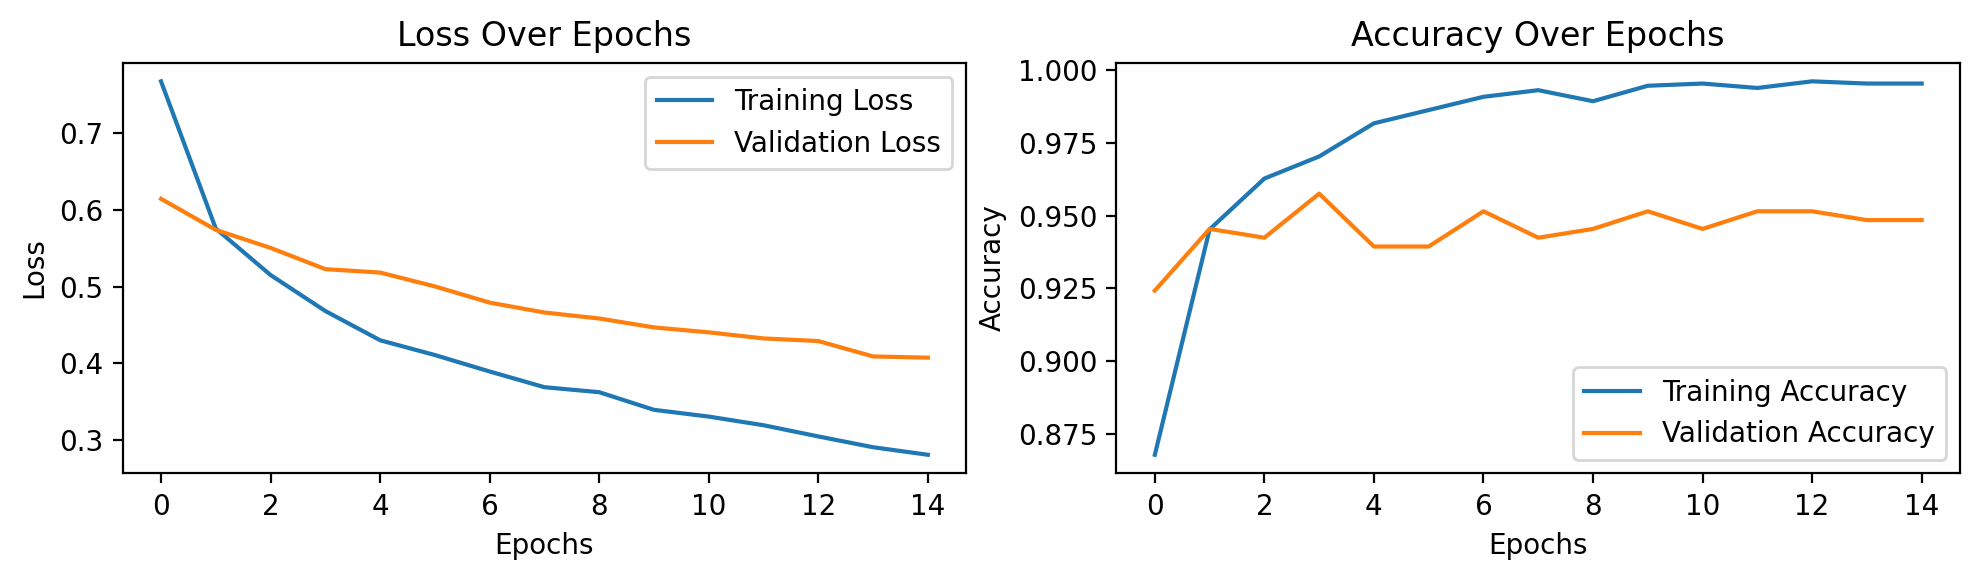

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert history object to DataFrame
history_df = pd.DataFrame(history.history)

# Set figure size and DPI
plt.figure(dpi=200, figsize=(10, 3))

# Plot Loss
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

# Plot Accuracy
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.tight_layout()
plt.show()


In [57]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9519 - loss: 0.3832
Validation Loss: 0.40731608867645264
Validation Accuracy: 0.9484848380088806


7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step


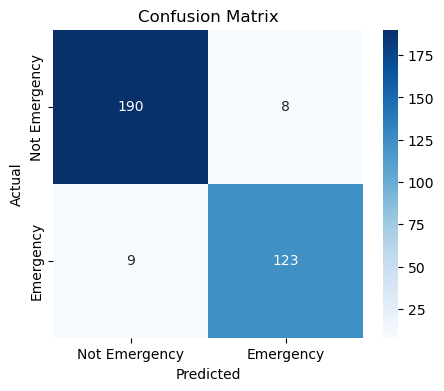

               precision    recall  f1-score   support

Not Emergency       0.95      0.96      0.96       198
    Emergency       0.94      0.93      0.94       132

     accuracy                           0.95       330
    macro avg       0.95      0.95      0.95       330
 weighted avg       0.95      0.95      0.95       330



In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Get actual labels
y_true = validation_generator.classes  # True labels from validation data

# Predict on validation set
y_pred = model.predict(validation_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Emergency", "Emergency"], yticklabels=["Not Emergency", "Emergency"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print classification report for precision, recall, F1-score
print(classification_report(y_true, y_pred, target_names=["Not Emergency", "Emergency"]))


## Evaluation stage

In [59]:
test_df.index

RangeIndex(start=0, stop=706, step=1)

In [60]:
test_dir_image = []
for i in tqdm(test_df.index):
    img_path = 'test/' + test_df['image_names'][i]  
    img = Image.open(img_path).convert('RGB')  
    img = img.resize((224, 224))  
    img = np.array(img) / 255.0  # Ensure normalization
    test_dir_image.append(img)

test = np.array(test_dir_image)


100%|██████████| 706/706 [00:06<00:00, 113.31it/s]


In [61]:
pred = model.predict(test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step


In [62]:
num_ = np.round(pred)  # Better rounding

In [63]:
# Save predictions
submission = pd.read_csv('sample_submission.csv')
submission['emergency_or_not'] = num_
submission.to_csv('submission29.csv', index=False)

In [64]:
submission.to_csv('submission29.csv', index = False)

In [74]:
import os
print(os.getcwd())  # Prints the current working directory


c:\Users\saran\Downloads\Smart-Traffic-Light-Regulation-main


In [65]:
img_path = r'C:\Users\saran\Downloads\Armstrong_Ambulance_P17.jpg'
img = Image.open(img_path).convert('RGB')  
img = img.resize((224, 224))  
img = np.array(img) / 255.0  # Normalize
test = np.expand_dims(img, axis=0)  # Expand dimensions for model 

In [66]:
pred = model.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [67]:
print(np.round(pred))

[[1.]]


In [102]:
submission.head(5)

,image_names,emergency_or_not
0,1960.jpg,0.0
1,668.jpg,1.0
2,2082.jpg,0.0
3,808.jpg,1.0
4,1907.jpg,0.0


In [45]:
pip install --upgrade tensorflow tensorflow-hub


In [46]:
!pip install h5py
#import h5py as h5
import h5py


In [47]:
from tensorflow.keras.models import load_model
model.save('vehicle.keras')
model_vechile = load_model(('vehicle.keras'),custom_objects={'KerasLayer':hub.KerasLayer})

In [102]:
ff=cv2.imread("File_005_1618478020836_1618478037129.webp")

In [103]:
fff=np.array(ff)

In [104]:
img_path = 'tt.jpeg'  # Adjust the path to match the directory structure
img = Image.open(img_path).convert('RGB')  # Load image using PIL
img = img.resize((224, 224))  # Resize image
img = np.array(img)  # Convert image to NumPy array
#     img = img / 255.0  # Normalize pixel values
test_dir_image.append(img)

test = np.array(test_dir_image)

FileNotFoundError: [Errno 2] No such file or directory: 'tt.jpeg'

In [105]:
f=model_vechile.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


In [106]:
print(f)

[[4.8868674e-12]]
